# **Setup e carregamento dos dados**

Aqui começamos por importar as bibliotecas necessárias e carregar os dados do ficheiro CSV.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

DATA_PATH = Path("group_15.csv")
assert DATA_PATH.exists(), f"Ficheiro não encontrado: {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
print("Dimensão:", df.shape)
df.head()


Dimensão: (3000, 49)


,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,...,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_class,target_regression
0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,1.0,0.221824,0.767388,...,0.0,0.0,0.755223,1.619076,0.778312,1,0.093345,0.232,class_53,0.930791
1,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0,0.221824,0.485996,...,0.0,0.0,0.634436,-1.100584,0.086806,1,0.300788,0.365,class_53,0.751458
2,0.0,0.0,0.0,1.0,0.0,4.0,3.0,1.0,0.221824,0.485996,...,0.0,0.0,0.635036,-1.173949,0.011324,1,0.352649,0.327,class_53,0.213459
3,0.0,0.0,0.0,1.0,0.0,4.0,3.0,2.0,0.221824,-0.076786,...,0.0,0.0,-1.528729,0.669622,0.954538,1,1.447484,0.162,class_53,0.572125
4,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0,0.221824,0.485996,...,0.0,0.0,-0.929196,0.863212,0.706977,1,-1.589244,0.295,class_53,0.572125


In [8]:
# Contar quantos valores iguais a 1
count_ones = (df['is_dance_hit'] == 0).sum()
print(f"Valores iguais a 1 na coluna 'duration_5': {count_ones}")

Valores iguais a 1 na coluna 'duration_5': 3000


# **Exploração inicial**
Aqui fazemos algumas conversões de tipos de dados e exploramos o dataset para entender melhor a sua estrutura e conteúdo.

---

Nesta célula abaixo, conseguimos ver os tipos de dados presentes no dataset.

In [2]:
dtypes = df.dtypes.astype(str).to_frame("dtype")
display(dtypes)

,dtype
duration_1,float64
duration_2,float64
duration_3,float64
duration_4,float64
duration_5,float64
loudness_level,float64
popularity_level,float64
tempo_class,float64
time_signature,float64
key_mode,float64


Verificamos que existem algumas colunas que são do tipo 'object', vamos verificar se algumas dessas colunas podem ser convertidas para numéricas.

In [3]:
display(df.select_dtypes(include=['object']).head(10))

,signal_strength,focus_factor,signal_power,target_class
0,0.232,0.000548,0.232,class_53
1,0.365,0.0,0.365,class_53
2,0.327,0.0,0.327,class_53
3,0.162,0.0235,0.162,class_53
4,0.295,0.000279,0.295,class_53
5,0.177,9.82e-05,0.177,class_53
6,0.211,1.44e-05,0.211,class_53
7,0.173,0.000111,0.173,class_53
8,0.36,0.0,0.36,class_53
9,0.182,0.00604,0.182,class_53


Como verificamos acima, as colunas 'signal_strength', 'focus_factor' e 'signal_power' são do tipo 'object' mas  podem ser convertidas para numéricas.
Vamos proceder a essas conversões.

In [20]:
df['signal_strength']= pd.to_numeric(df['signal_strength'], errors='coerce')
df['focus_factor']= pd.to_numeric(df['focus_factor'], errors='coerce')
df['signal_power']= pd.to_numeric(df['signal_power'], errors='coerce')

print(df[['signal_strength', 'focus_factor', 'signal_power']])

      signal_strength  focus_factor  signal_power
0           -0.592172     -0.726770     -0.592172
1           -0.096678     -0.728121     -0.096678
2           -0.238248     -0.728121     -0.238248
3           -0.852959     -0.670178     -0.852959
4           -0.357465     -0.727433     -0.357465
...               ...           ...           ...
2995         2.242948      1.601894      2.242948
2996         1.877847      1.537788      1.877847
2997         2.265301      1.707916      2.265301
2998         2.261575      1.717779      2.261575
2999         0.436071     -0.728121      0.436071

[2995 rows x 3 columns]


# **Análise exploratória dos dados**
Aqui fazemos uma análise exploratória dos dados para entender melhor as suas características e identificar possíveis padrões ou anomalias.

---

Definimos as variáveis target de classificação e regressão.

In [5]:
target_class= 'target_class'
target_regression= 'target_regression'

print("Target de classificação:", target_class)
print("Target de regressão:", target_regression)

Target de classificação: target_class
Target de regressão: target_regression


## Estatísticas descritivas

Este passo é importante para nos ajudar a entender melhor a distribuição dos dados e identificar possíveis outliers e tendências.

### Descrição das features numéricas
Aqui calculamos algumas estatísticas descritivas para as features numéricas do dataset.

In [6]:
desc_num = df.select_dtypes(include=[np.number]).describe().T
display(desc_num)

,count,mean,std,min,25%,50%,75%,max
duration_1,3000.0,0.005000,0.070545,0.000000,0.000000,0.000000e+00,0.000000,1.000000
duration_2,3000.0,0.039667,0.195207,0.000000,0.000000,0.000000e+00,0.000000,1.000000
duration_3,3000.0,0.141667,0.348766,0.000000,0.000000,0.000000e+00,0.000000,1.000000
duration_4,3000.0,0.802667,0.398052,0.000000,1.000000,1.000000e+00,1.000000,1.000000
duration_5,3000.0,0.011000,0.104320,0.000000,0.000000,0.000000e+00,0.000000,1.000000
loudness_level,3000.0,3.111667,1.271903,0.000000,2.000000,4.000000e+00,4.000000,4.000000
popularity_level,3000.0,1.681333,0.952936,0.000000,1.000000,1.000000e+00,3.000000,4.000000
tempo_class,3000.0,1.154667,0.416497,0.000000,1.000000,1.000000e+00,1.000000,4.000000
time_signature,3000.0,-0.609543,2.318389,-9.024149,0.221824,2.218242e-01,0.221824,2.533318
key_mode,3000.0,-0.046687,1.000321,-1.511882,-0.920961,-7.678645e-02,0.767388,1.611562


### Target Classificação
Aqui calculamos algumas estatísticas descritivas para o target de classificação.

In [7]:
class_dist = df[target_class].value_counts(dropna=False)
print("\nDistribuição do target_class:\n", class_dist)



Distribuição do target_class:
 target_class
class_53     1000
class_96     1000
class_103    1000
Name: count, dtype: int64


Podemos concluir que o 'target_class' está perfeitamente equilibrado, onde cada classe tem 1000 registos.

### Target Regressão
Aqui calculamos algumas estatísticas descritivas para o target de regressão.

In [8]:
yreg = df[target_regression]

reg_summary = pd.Series({
    "count": yreg.shape[0],
    "mean": yreg.mean(),
    "std": yreg.std(ddof=1),
    "min": yreg.min(),
    "25%": yreg.quantile(0.25),
    "50%": yreg.median(),
    "75%": yreg.quantile(0.75),
    "max": yreg.max(),
    "skew": yreg.skew(),
    "kurtosis": yreg.kurtosis()
    }, name="target_regression_summary")
display(reg_summary.to_frame())

,target_regression_summary
count,3000.000000
mean,0.060129
std,0.927742
min,-1.490205
25%,-0.907373
50%,0.123792
75%,0.885958
max,2.499956
skew,-0.071298
kurtosis,-1.284415


## Análise Univariada
Esta análise foca-se em examinar cada variável individualmente para entender a sua distribuição e características.

### Distribuição do target de regressão

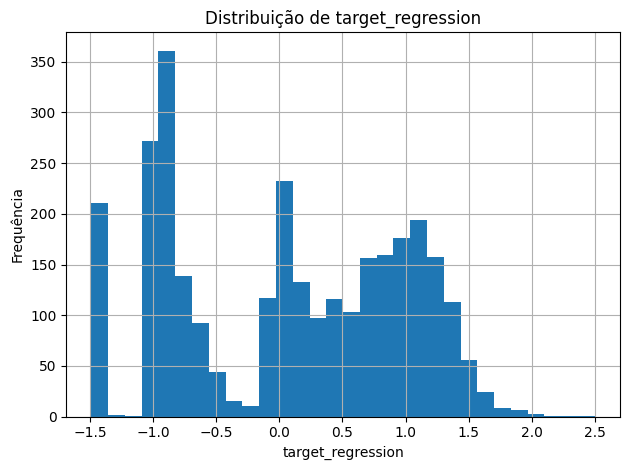

In [9]:
plt.figure()
df[target_regression].hist(bins=30)
plt.title(f"Distribuição de {target_regression}")
plt.xlabel(target_regression)
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

### Distribuição das features mais correlacionadas com o target de regressão
Separamos as features que apresentam maior correlação com o target de regressão, com o intuito de podermos apenas visualizar as distribuições das features que mais impactam o modelo.

c:\Users\DavidMendonça\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\DavidMendonça\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


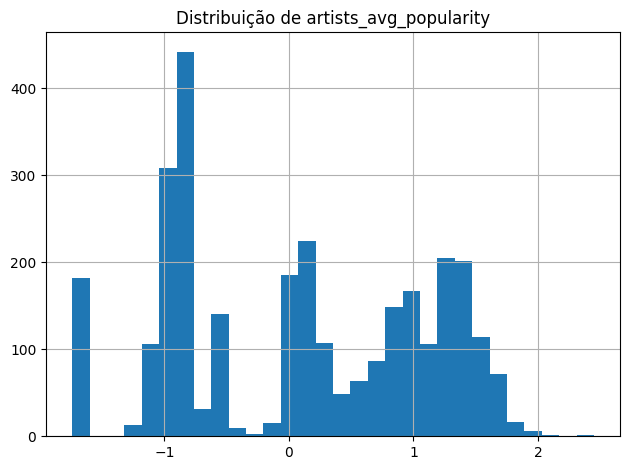

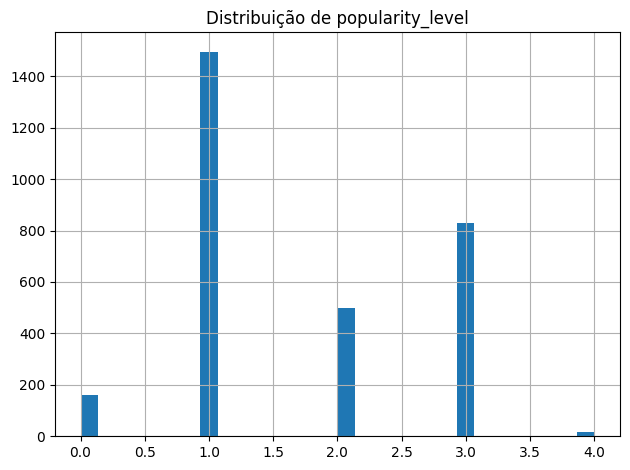

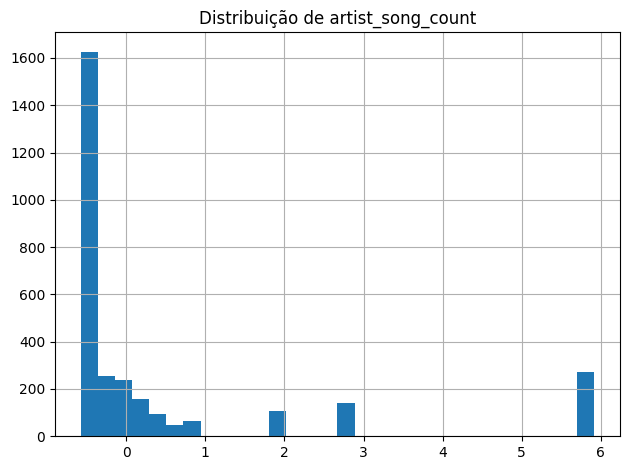

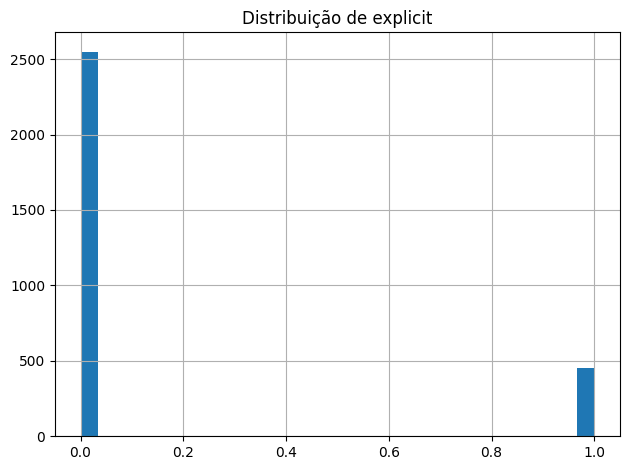

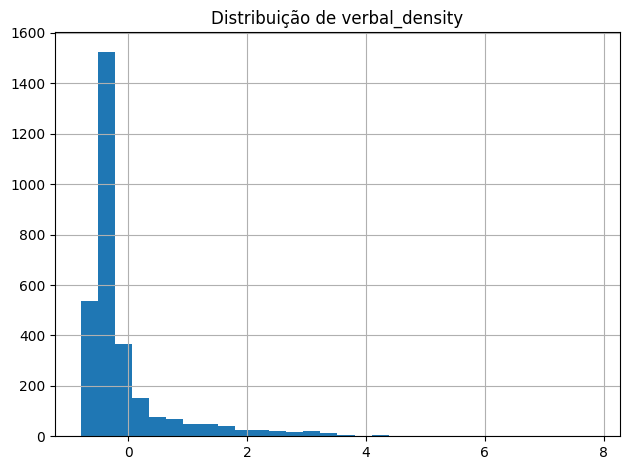

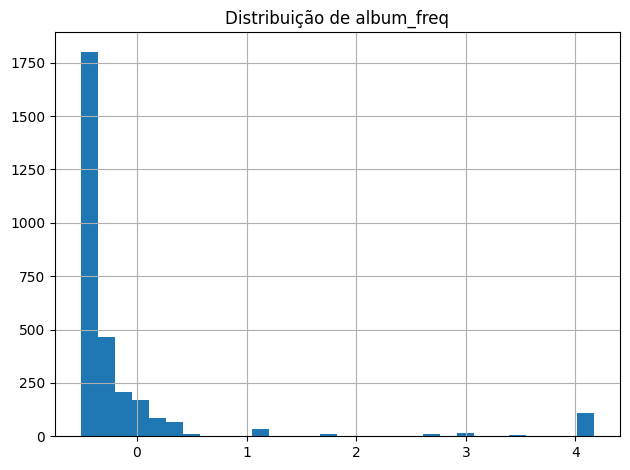

In [10]:
num_cols = df.select_dtypes(include='number').columns.drop([target_regression])
top6 = (df[num_cols]
        .corrwith(df[target_regression])
        .abs().sort_values(ascending=False)
        .head(6).index.tolist())

for feat in top6:
    plt.figure()
    df[feat].dropna().hist(bins=30)
    plt.title(f"Distribuição de {feat}")
    plt.tight_layout(); plt.show()

### ⚠️ Distribuição de todas as features 
Aqui analisamos as distribuições de todas as features do dataset pois estas features podem mostrar caracteristicas que nos ajudem no pré-processamento dos dados.

>Nota: Execute esta célula apenas se quiser ver a distribuição de todas as features, caso contrário pode demorar algum tempo a ser executada e apresentar muitos gráficos.

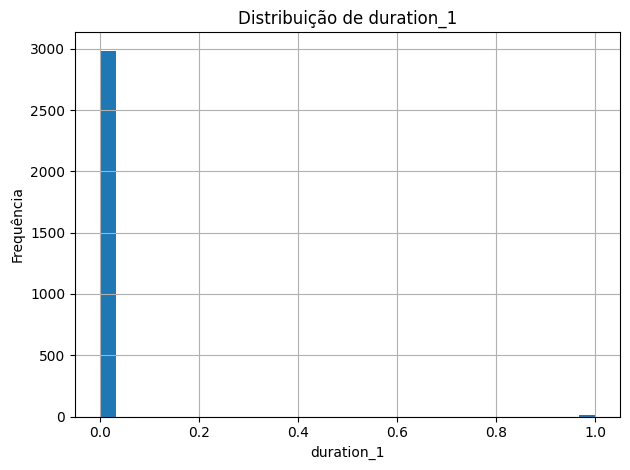

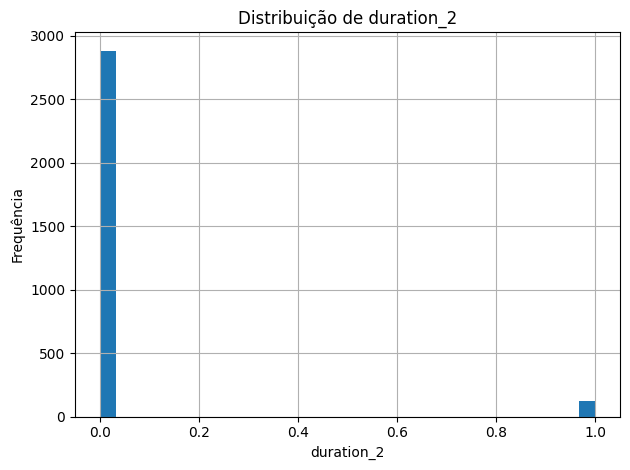

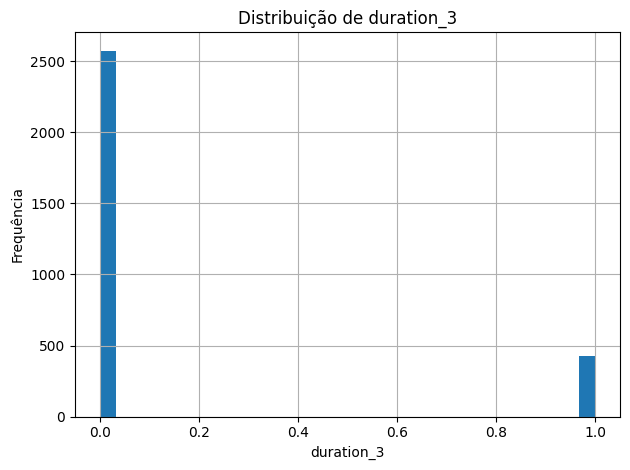

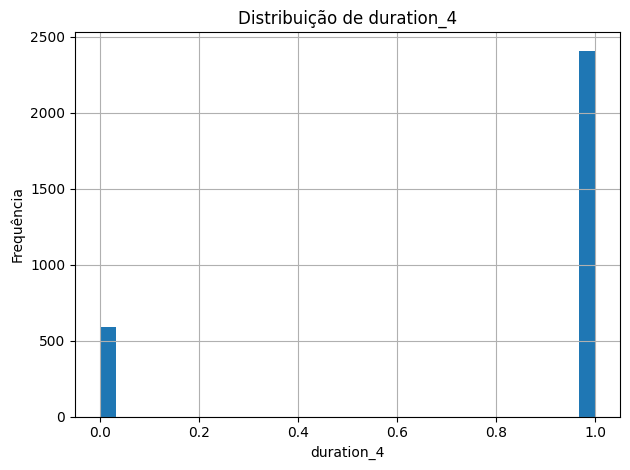

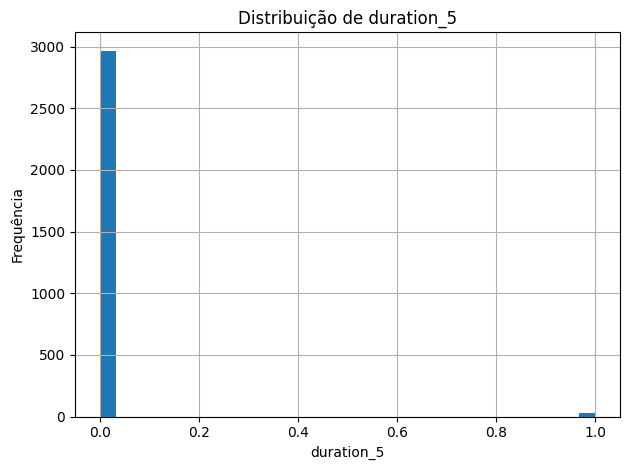

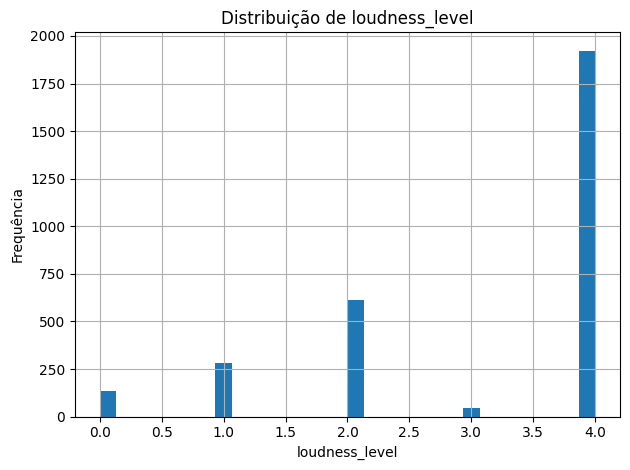

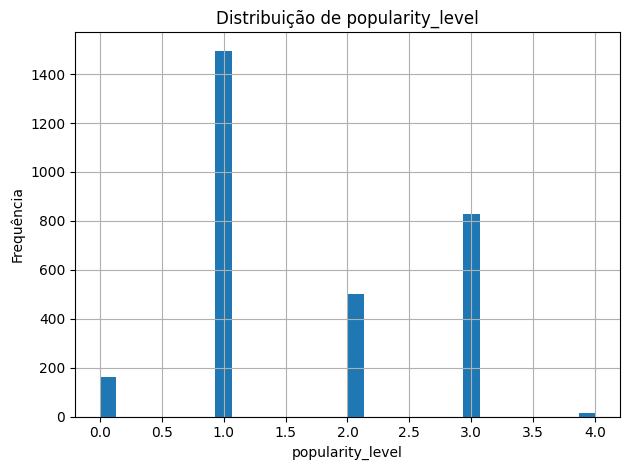

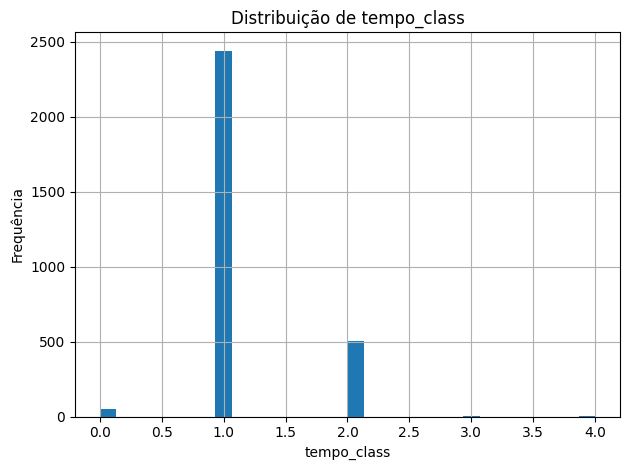

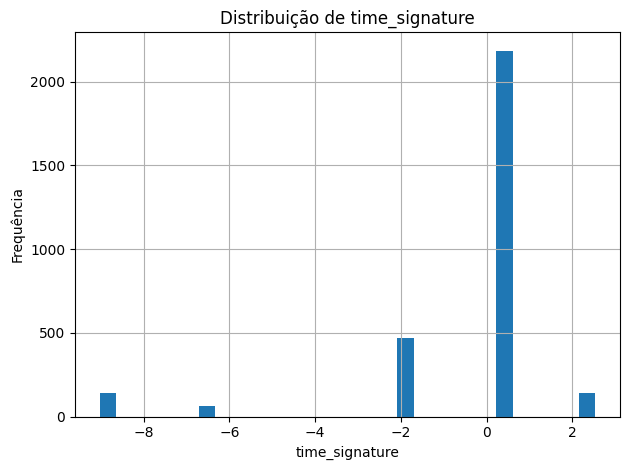

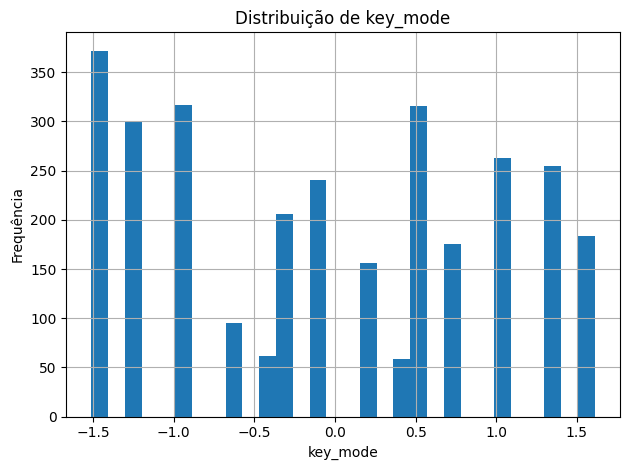

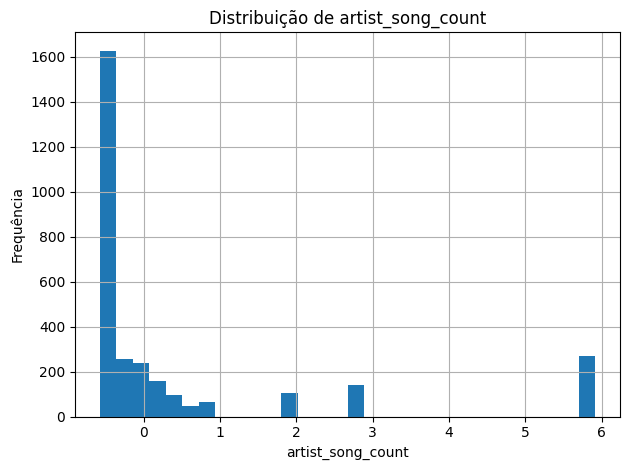

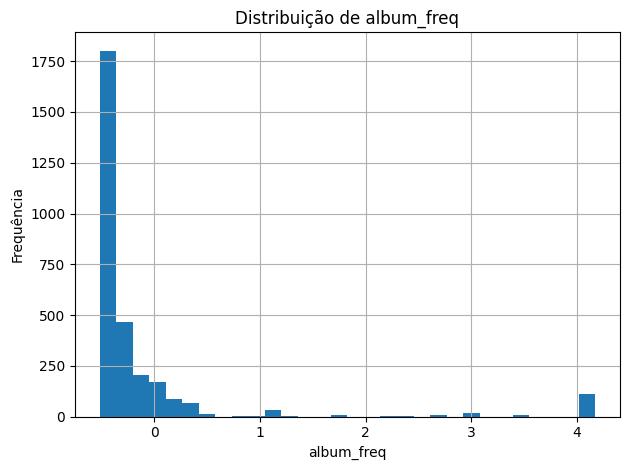

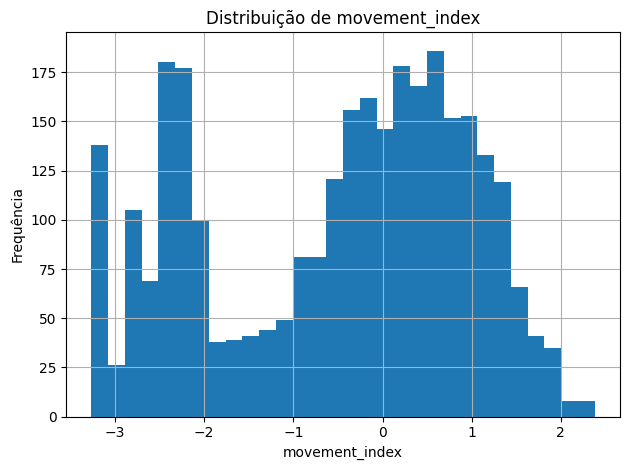

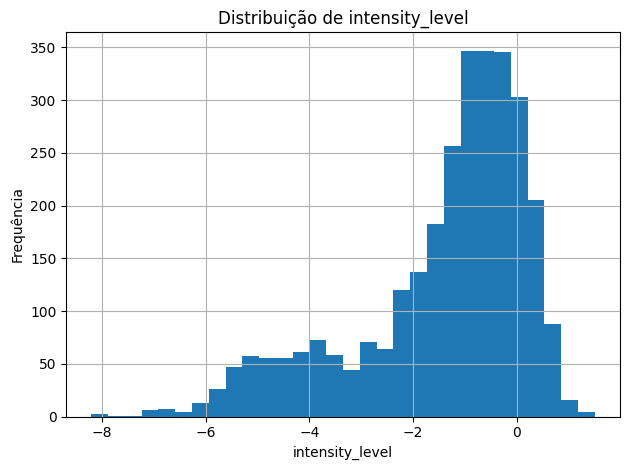

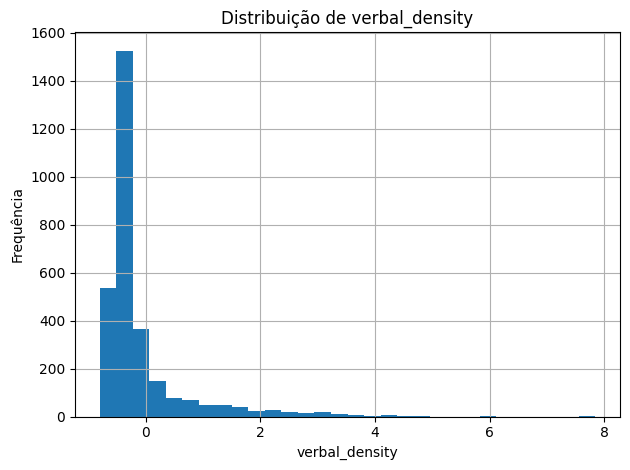

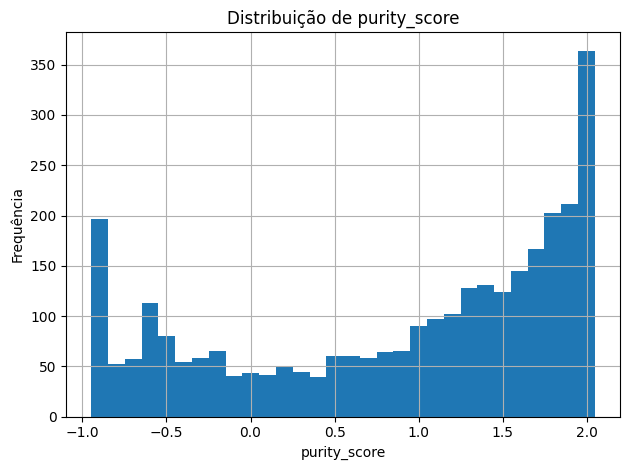

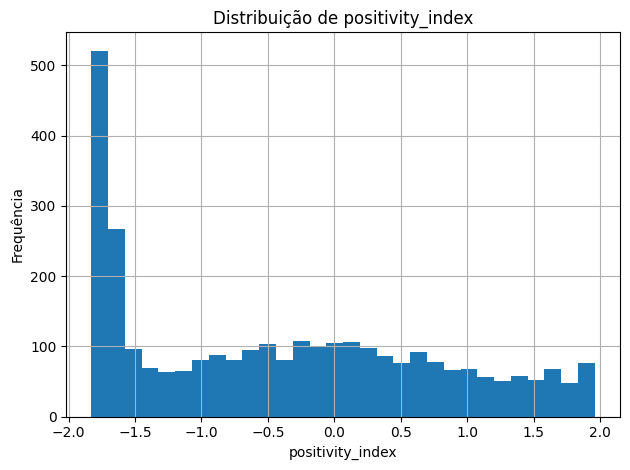

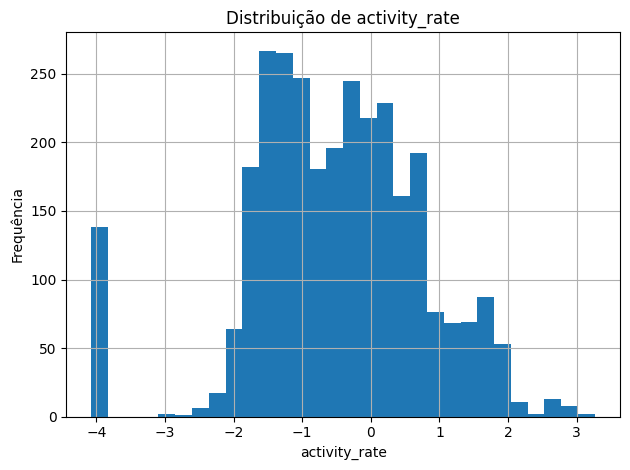

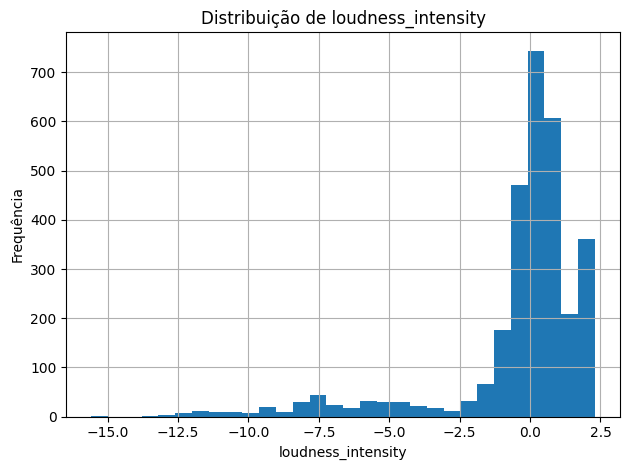

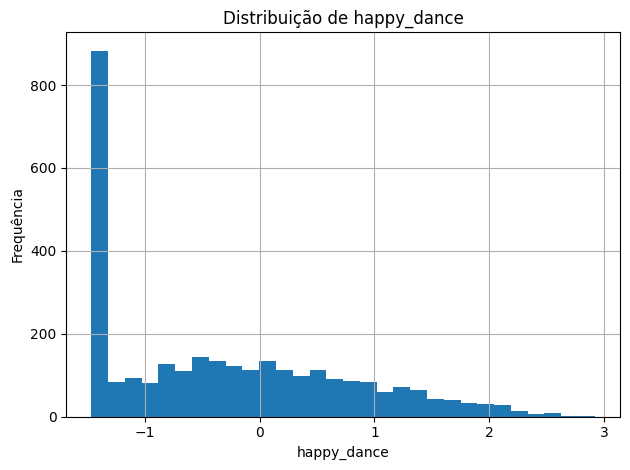

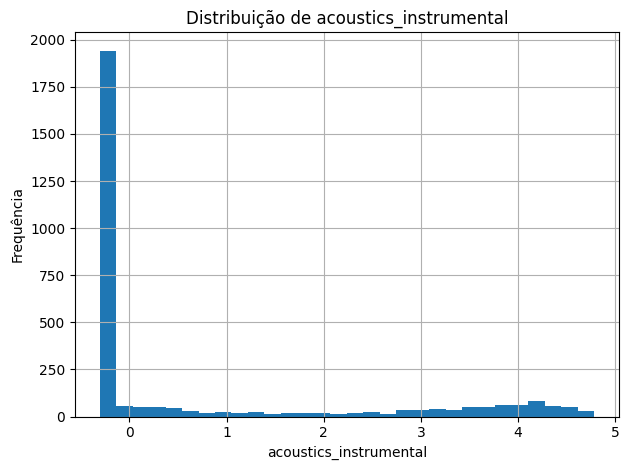

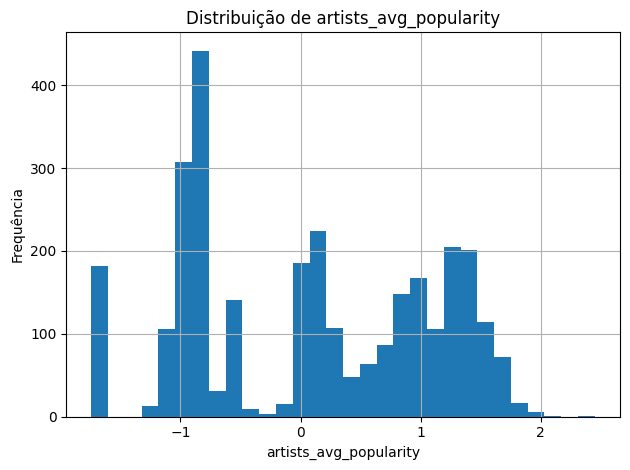

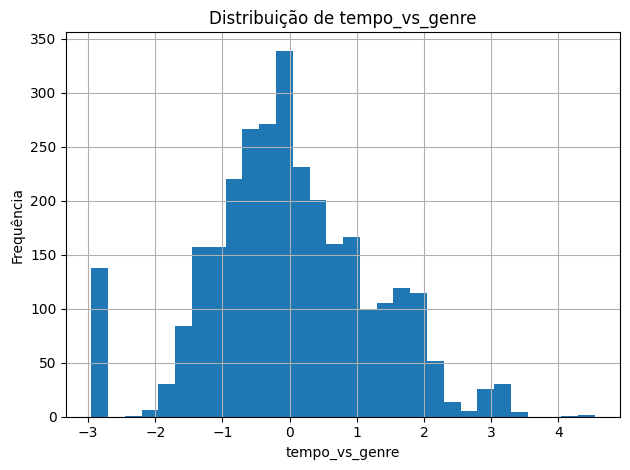

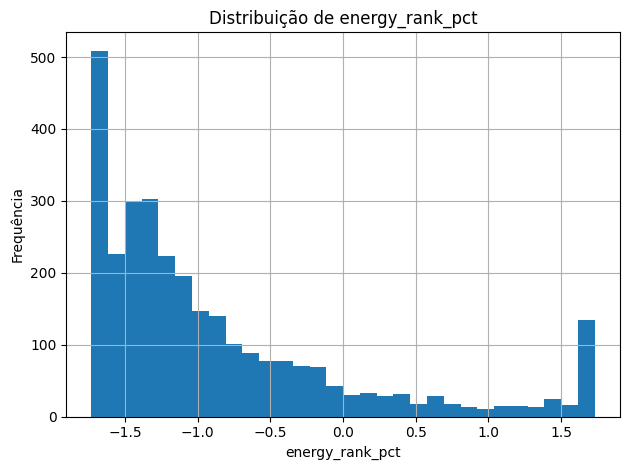

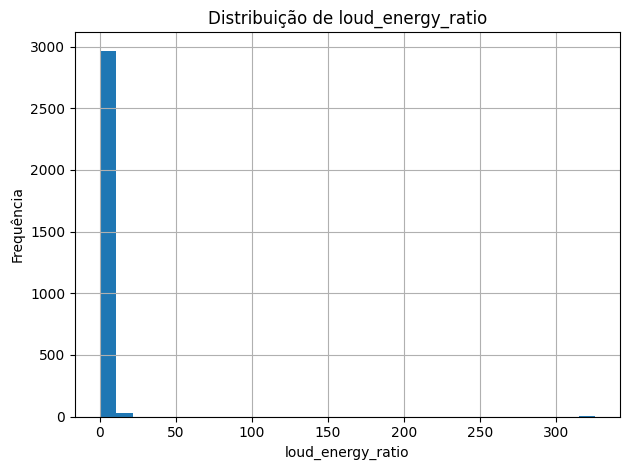

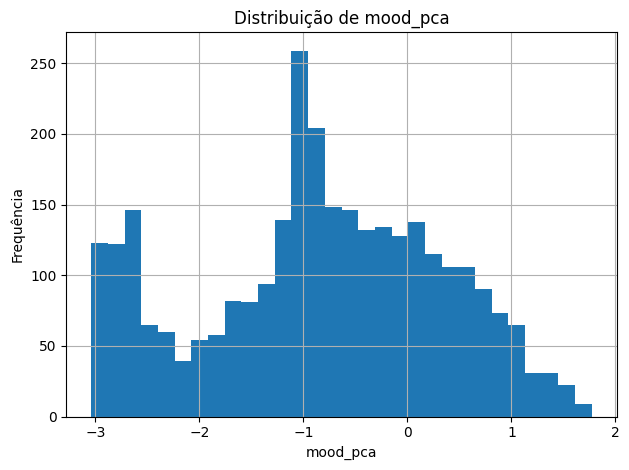

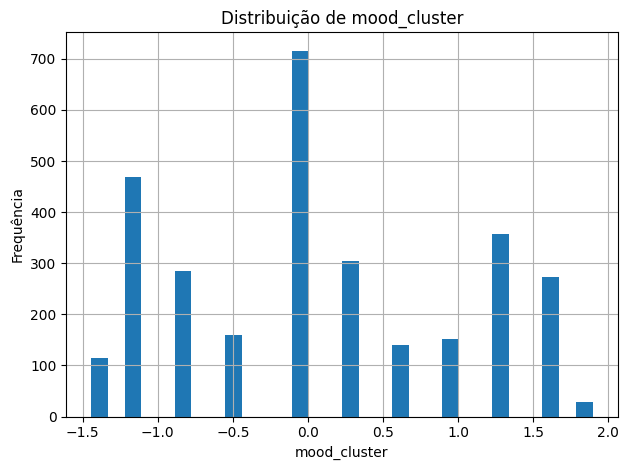

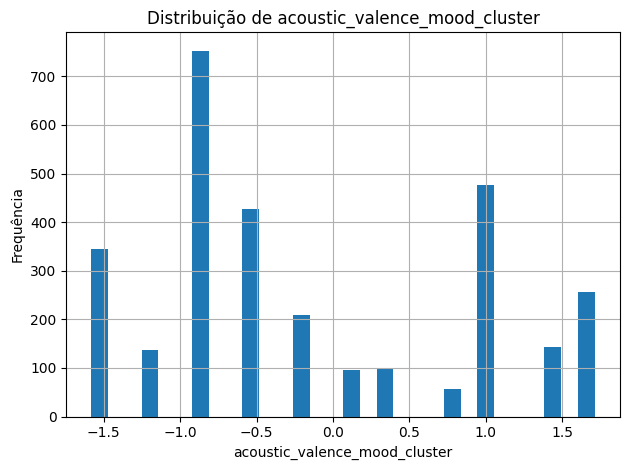

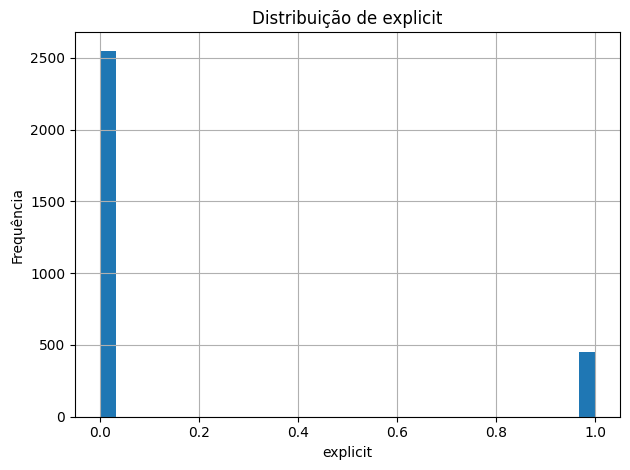

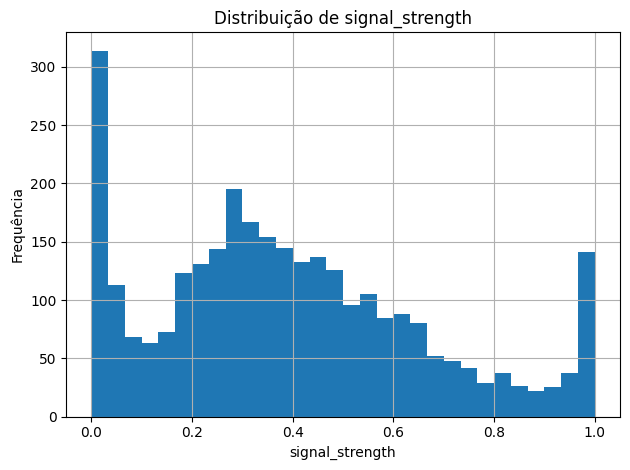

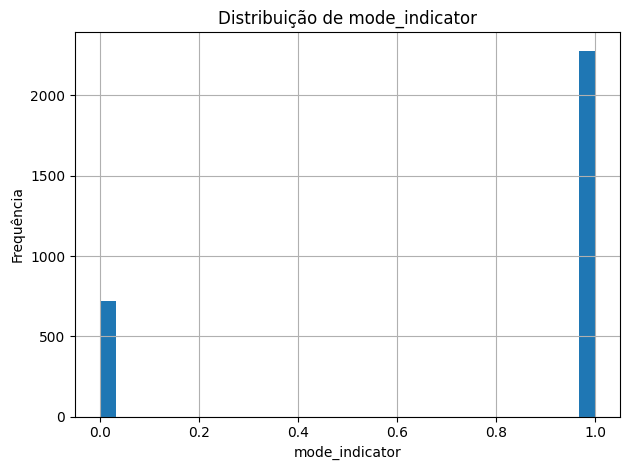

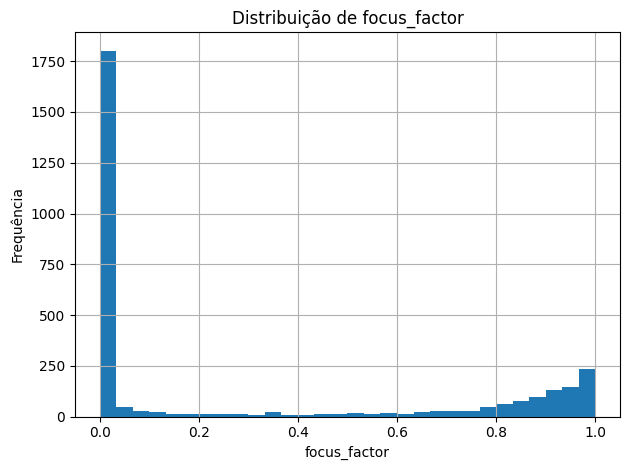

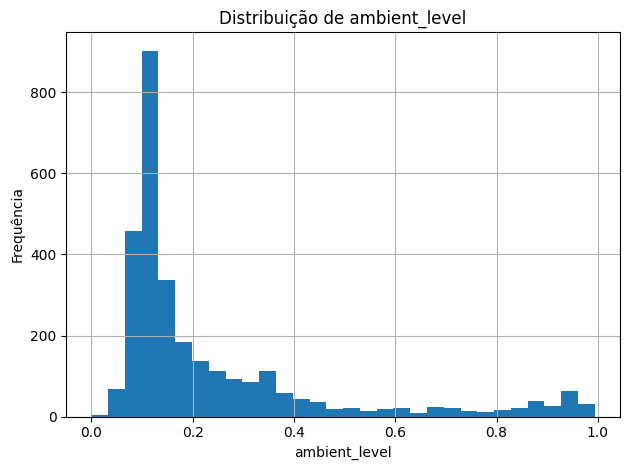

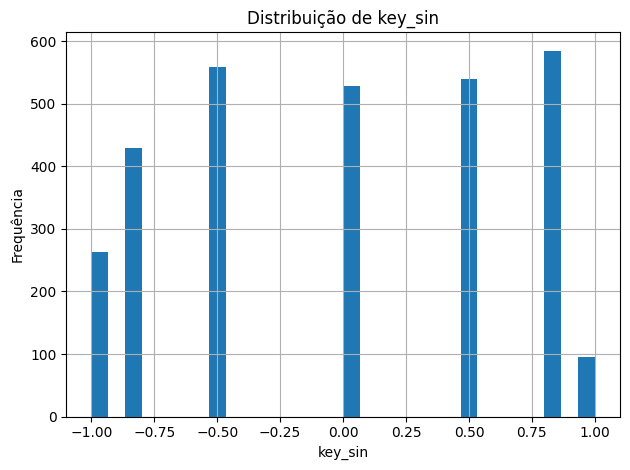

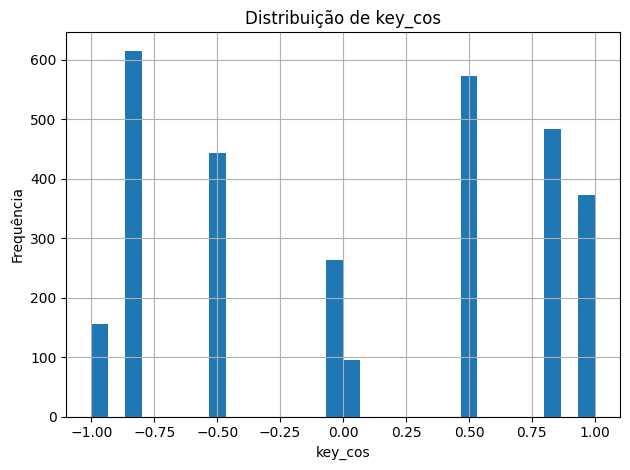

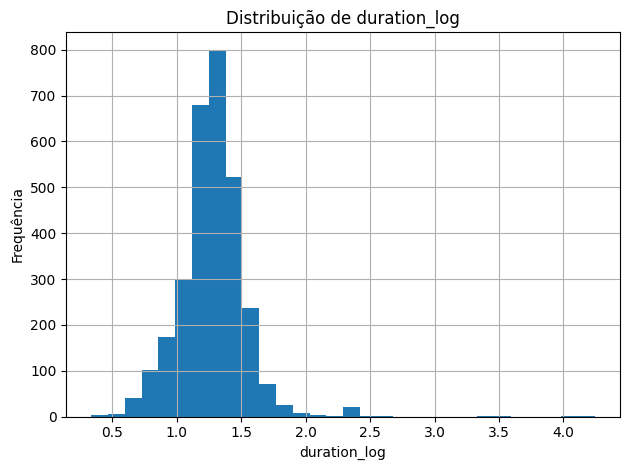

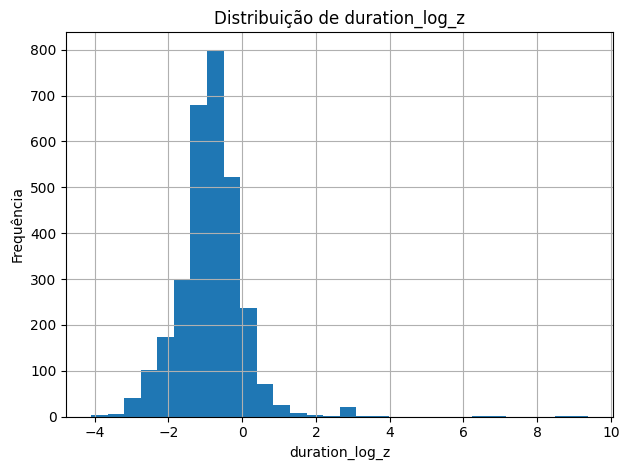

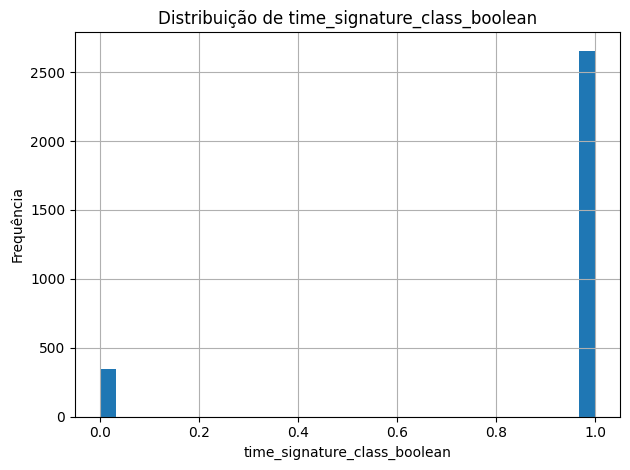

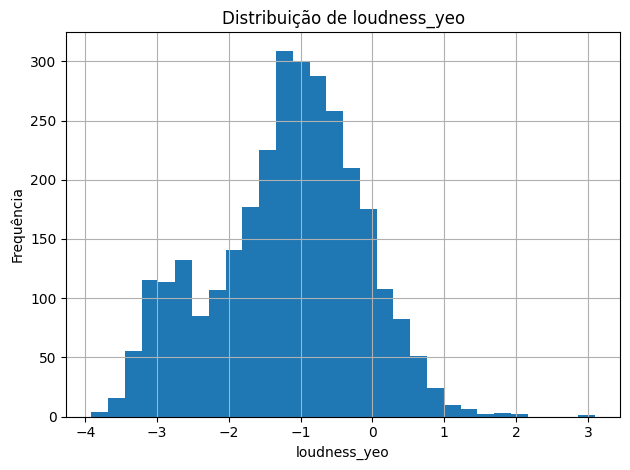

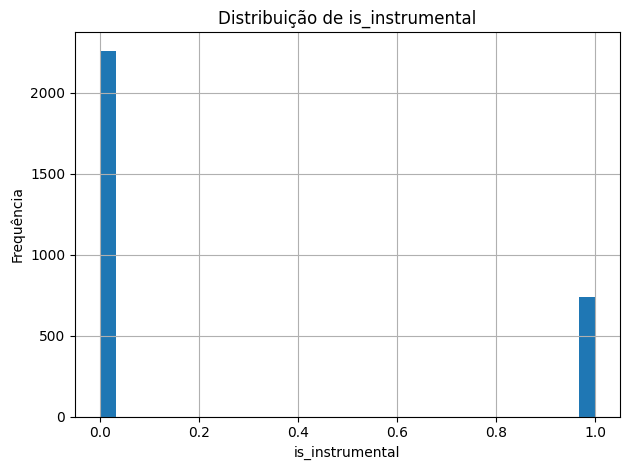

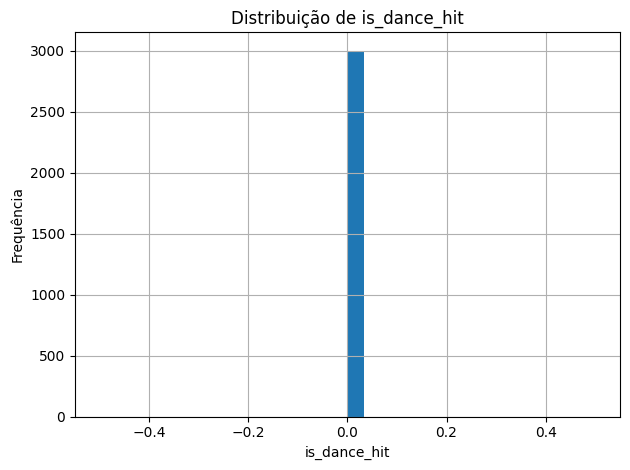

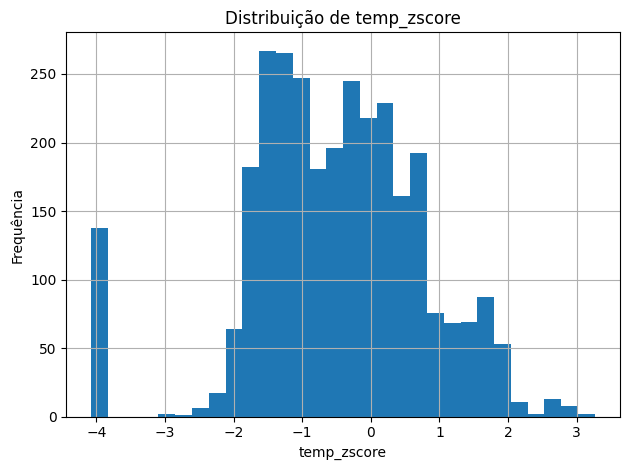

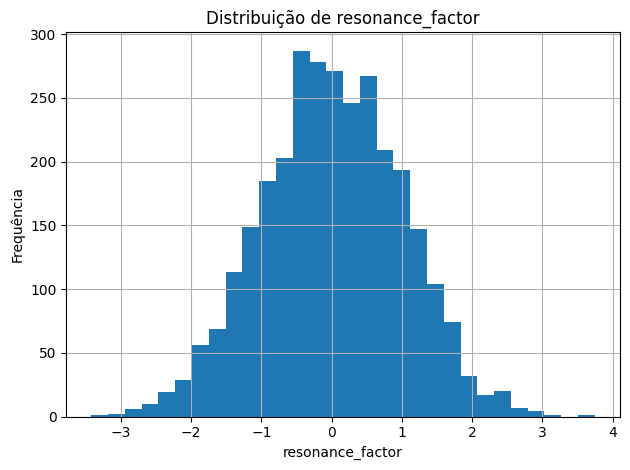

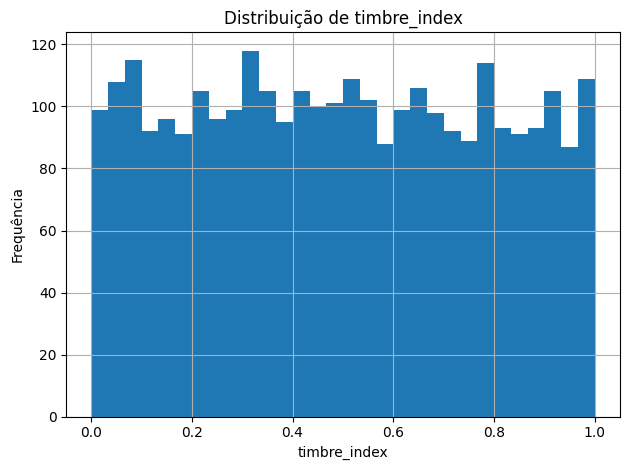

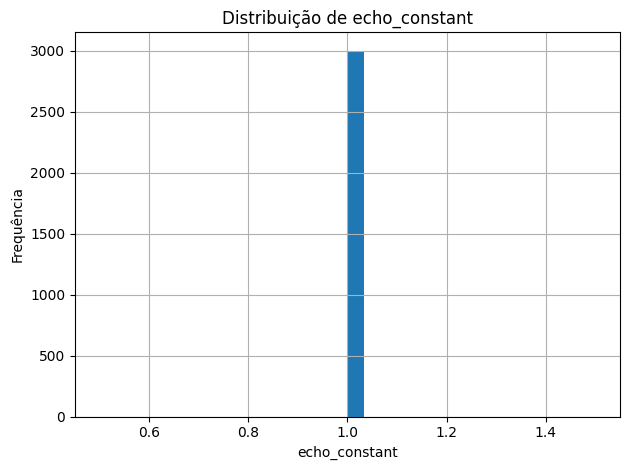

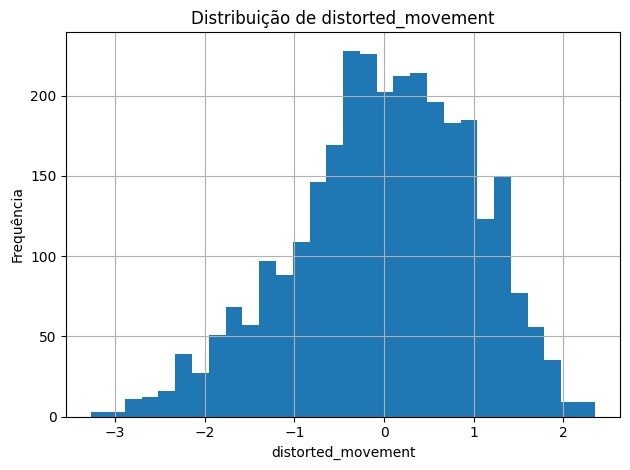

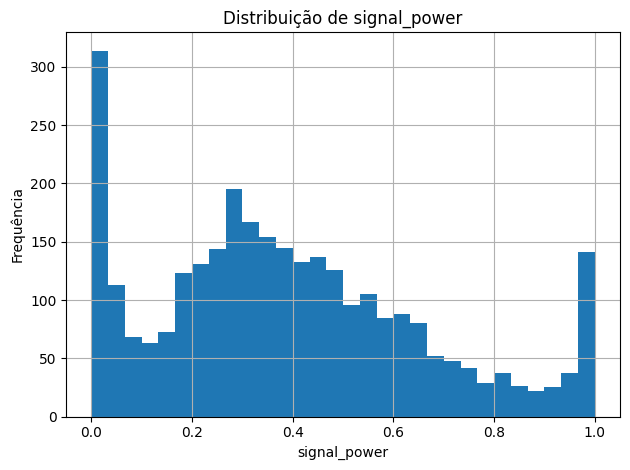

In [11]:
features = [c for c in df.columns if c not in [target_class, target_regression]]

for feat in features:
    plt.figure()
    df[feat].dropna().hist(bins=30)
    plt.title(f"Distribuição de {feat}")
    plt.xlabel(feat); plt.ylabel("Frequência")
    plt.tight_layout(); plt.show()

## Conclusões da Análise Univariada
Aqui apresentamos as principais conclusões obtidas a partir da análise univariada dos dados.

### Colunas constantes
Como podemos verificar nos histogramas acima, as colunas 'is_dance_hit' e 'echo_constant' são constantes, ou seja, apresentam o mesmo valor para todos os registos. 

Estas colunas não fornecem informação útil para a modelagem e podem ser removidas do dataset.

In [ ]:
const_cols = df.columns[df.nunique() <= 1].tolist()

if const_cols:
    print(f" Colunas constantes: {const_cols}")
    
df = df.drop(columns=const_cols)

📋 Colunas constantes: ['is_dance_hit', 'echo_constant']


### Escalonamento dos dados
Como vemos nos histogramas acima, as features possuem diferentes escalas e distribuições.
Para garantir que todas as features contribuem igualmente para o modelo, é importante escalonar os dados.

#### Remoção de valores nulos
O escalonador que vamos utilizar é o StandardScaler do scikit-learn, esse escalonador não lida com valores nulos, então temos de garantir que não existem valores nulos no dataset antes de aplicá-lo.

Vamos averiguar o número de valores nulos, e consoante o resultado podemos optar por remover as linhas com valores nulos ou substituir por valores não nulos (média, mediana, moda, etc).

In [13]:
null_count = df.isnull().any(axis=1).sum()
total_rows = len(df)
null_percentage = (null_count / total_rows) * 100
print(f"  - Linhas com valores nulos: {null_count} ({null_percentage:.2f}%)")


  - Linhas com valores nulos: 5 (0.17%)


Como temos uma percentagem baixa de linhas com valores nulos (0.17%), optamos por remover as linhas com valores nulos.

In [14]:
df = df.dropna(how='any', axis=0)

null_count = df.isnull().any(axis=1).sum()
print(f"  - Linhas com valores nulos: {null_count}")

  - Linhas com valores nulos: 0


#### Uso do StandardScaler
Após garantir que não existem valores nulos no dataset, podemos aplicar o StandardScaler para escalonar as features numéricas, de forma a garantir que todas as features estejam na mesma escala. 

In [15]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in [target_class, target_regression]]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### ⚠️ Verificação das alterações feitas
Aqui verificamos se as alterações feitas no dataset foram aplicadas corretamente.

>Nota: Execute esta célula apenas se quiser verificar as alterações feitas, caso contrário pode demorar algum tempo a ser executada e apresentar muitos gráficos.

,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,...,time_signature_class_boolean,loudness_yeo,is_instrumental,temp_zscore,resonance_factor,timbre_index,distorted_movement,signal_power,target_class,target_regression
0,-0.070948,-0.203413,2.459077,-2.014726,-0.105552,0.697874,1.382525,-0.371211,0.358444,0.812481,...,0.359041,-0.126722,-0.572852,0.981298,1.613806,0.979672,0.095473,-0.592172,class_53,0.930791
1,-0.070948,-0.203413,-0.406657,0.496345,-0.105552,-0.875429,1.382525,-0.371211,0.358444,0.531136,...,0.359041,0.597438,-0.572852,0.887931,-1.115165,-1.417543,0.302958,-0.096678,class_53,0.751458
2,-0.070948,-0.203413,-0.406657,0.496345,-0.105552,0.697874,1.382525,-0.371211,0.358444,0.531136,...,0.359041,0.376118,-0.572852,0.888396,-1.188781,-1.679211,0.354829,-0.238248,class_53,0.213459
3,-0.070948,-0.203413,-0.406657,0.496345,-0.105552,0.697874,1.382525,2.030038,0.358444,-0.031554,...,0.359041,0.317909,-0.572852,-0.784154,0.661102,1.590585,1.449889,-0.852959,class_53,0.572125
4,-0.070948,-0.203413,-0.406657,0.496345,-0.105552,-0.875429,1.382525,-0.371211,0.358444,0.531136,...,0.359041,0.774817,-0.572852,-0.320726,0.855354,0.732377,-1.587460,-0.357465,class_53,0.572125


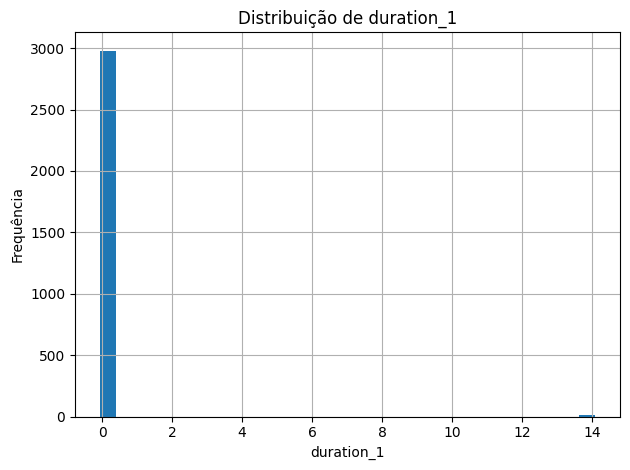

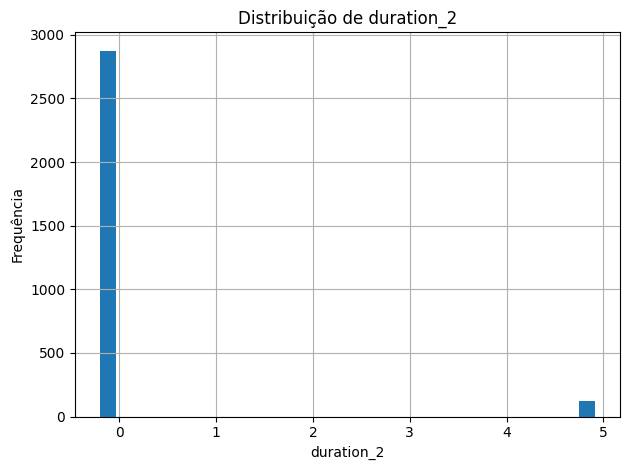

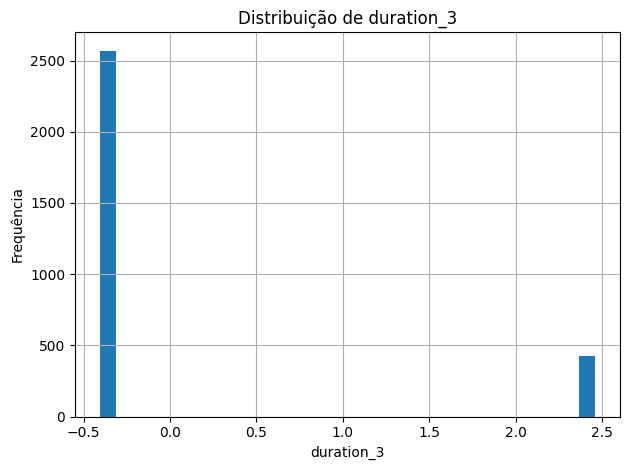

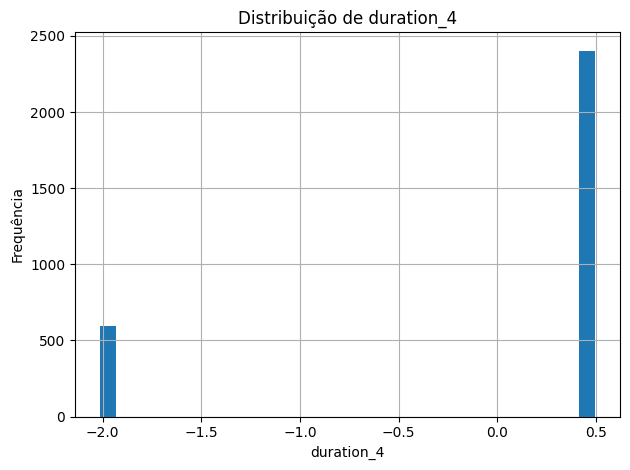

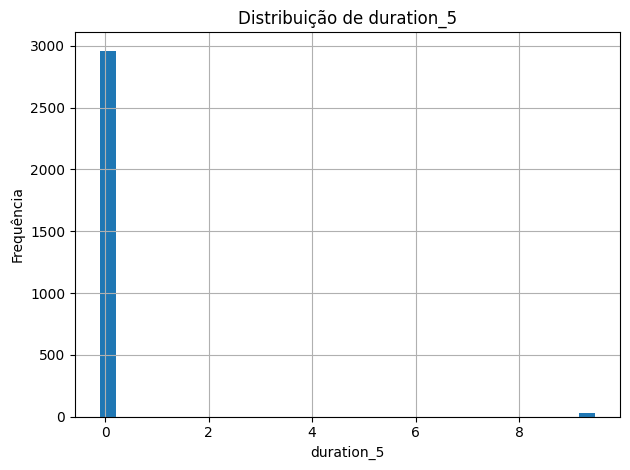

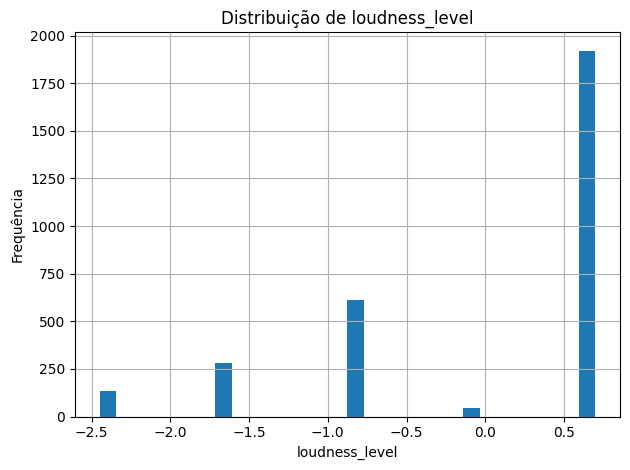

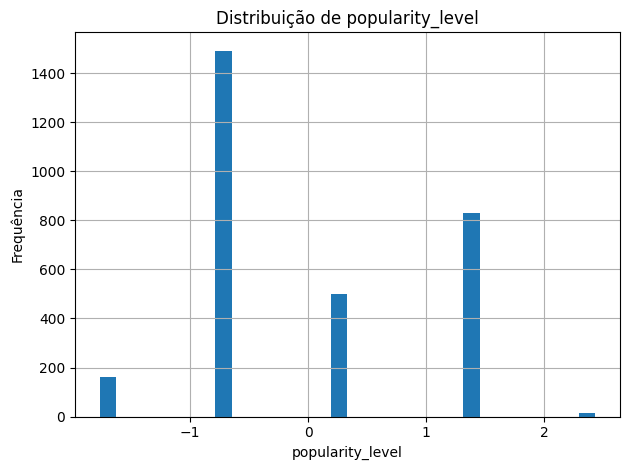

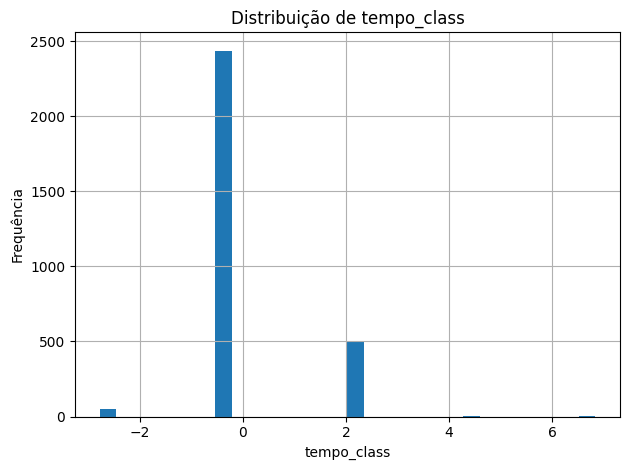

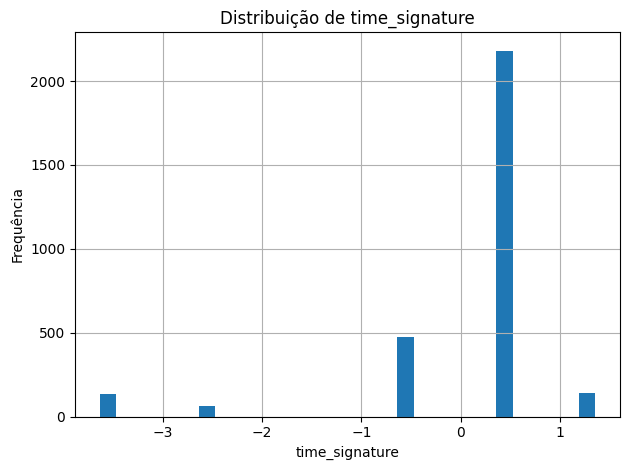

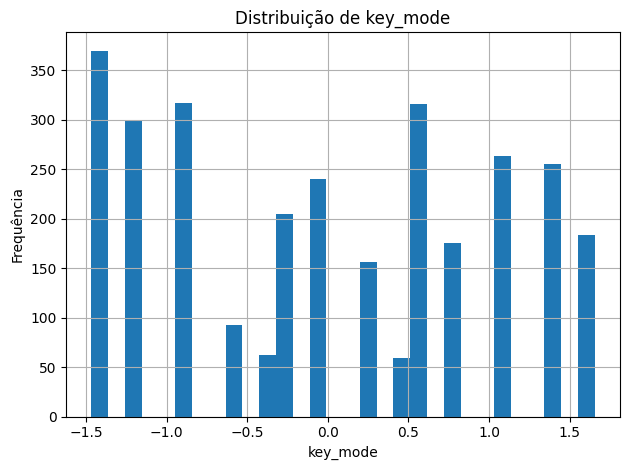

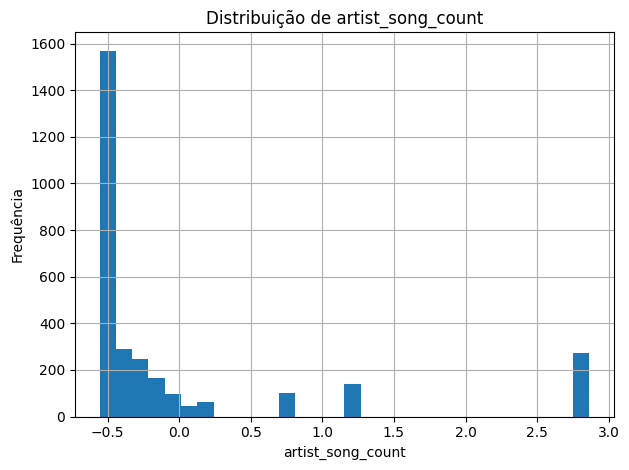

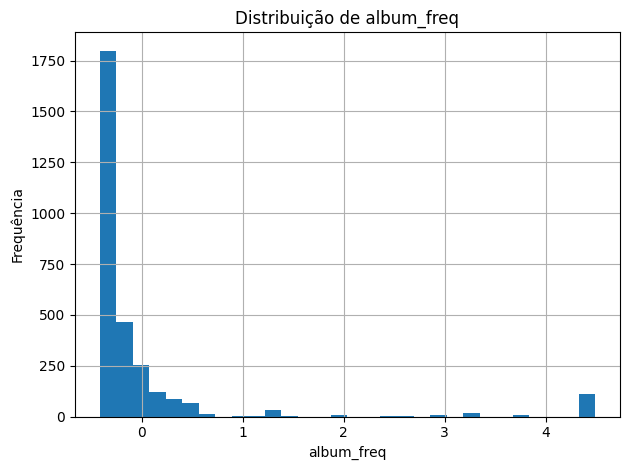

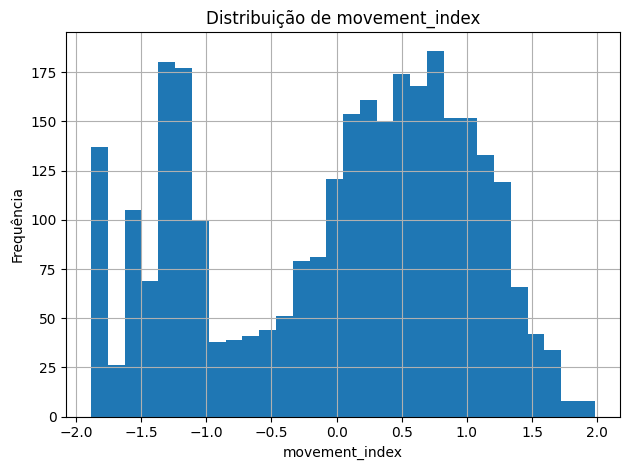

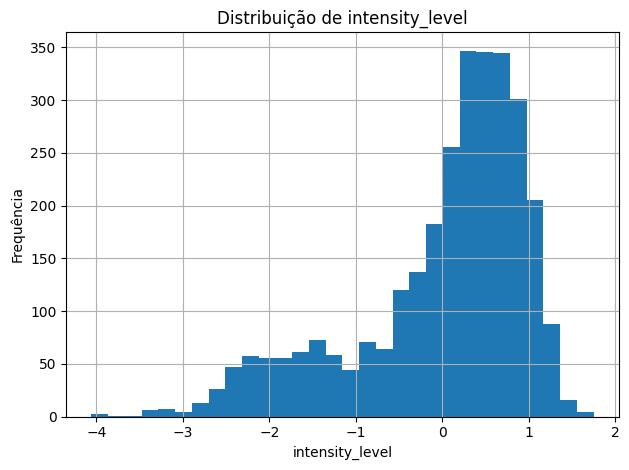

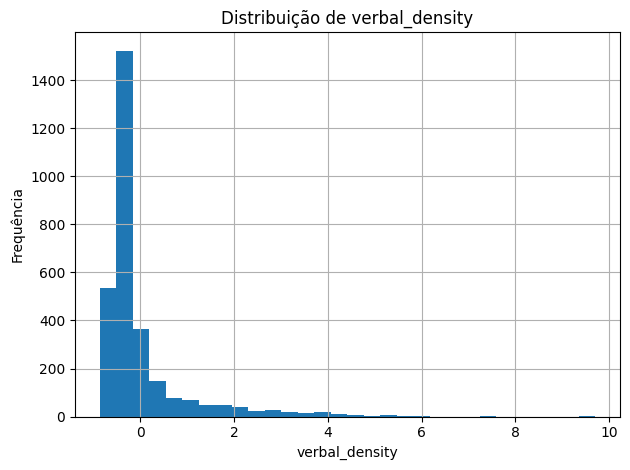

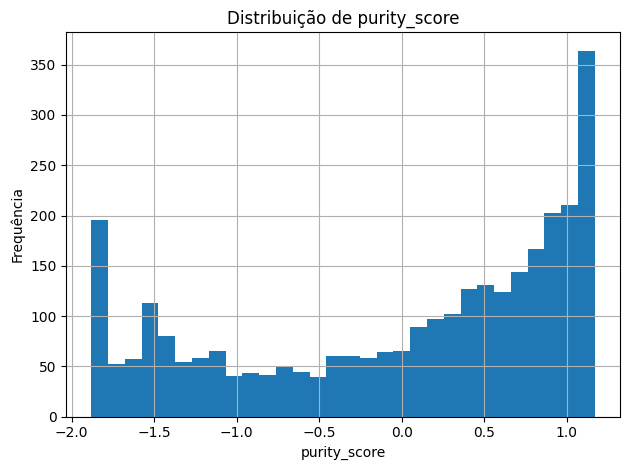

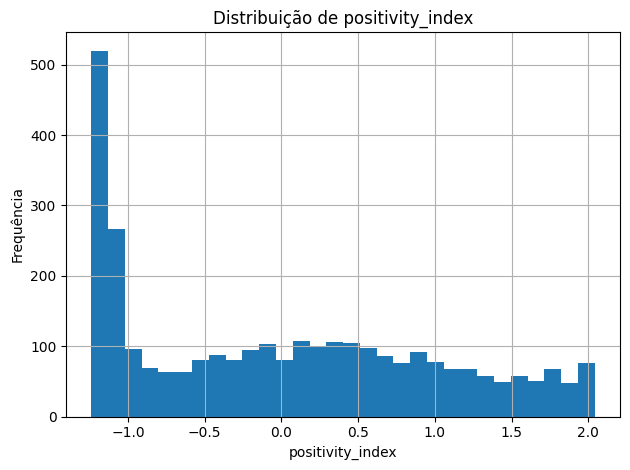

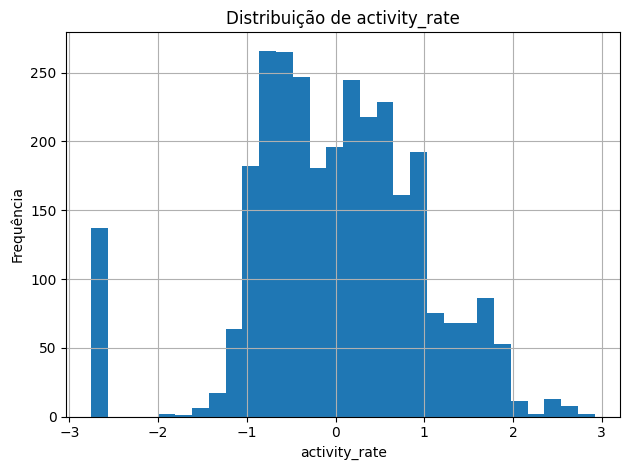

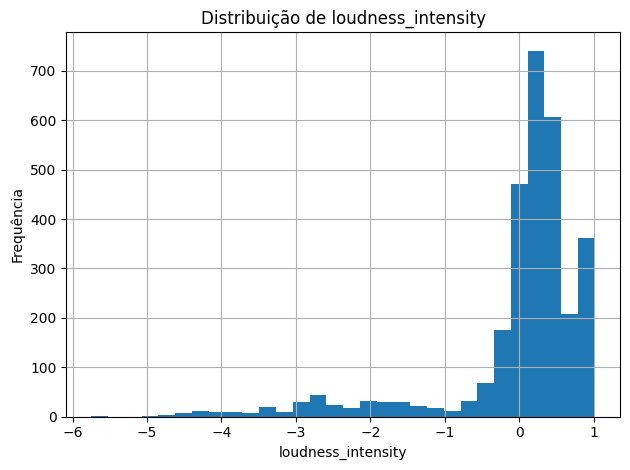

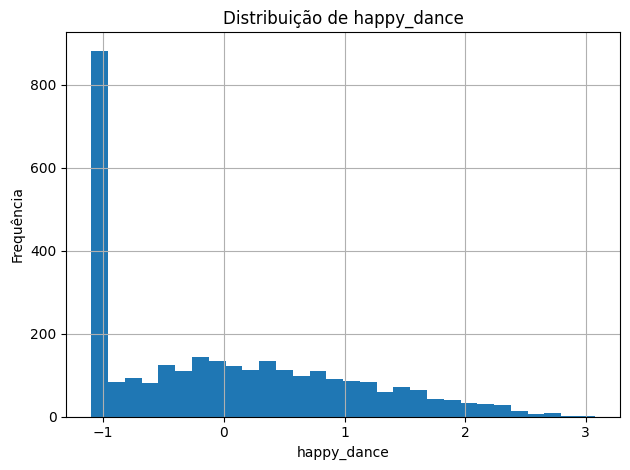

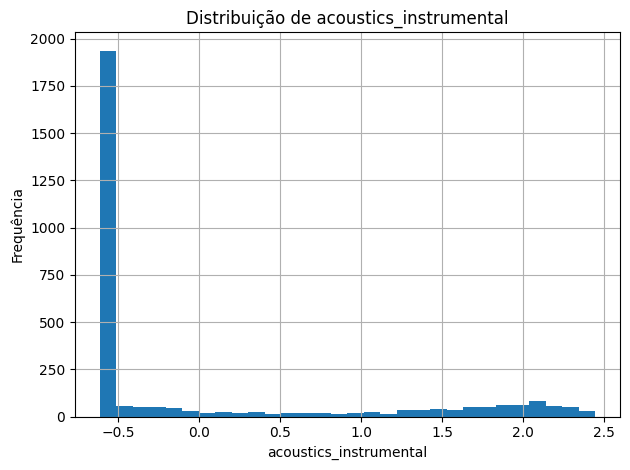

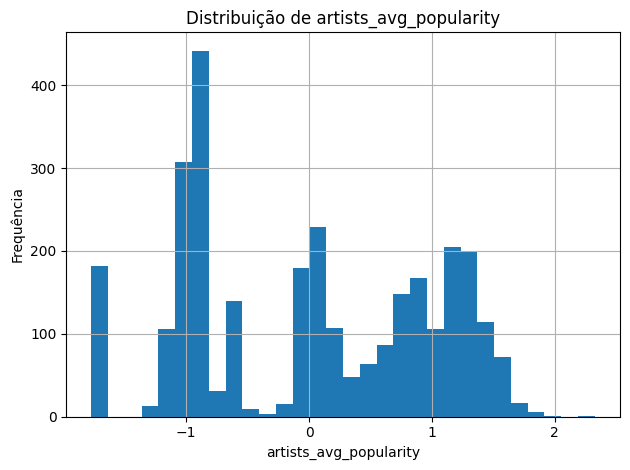

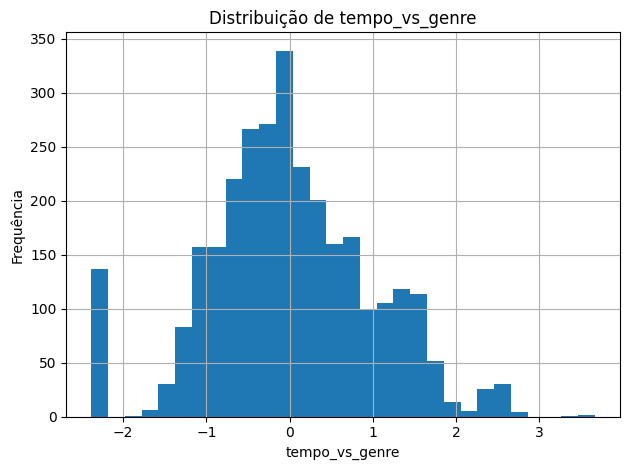

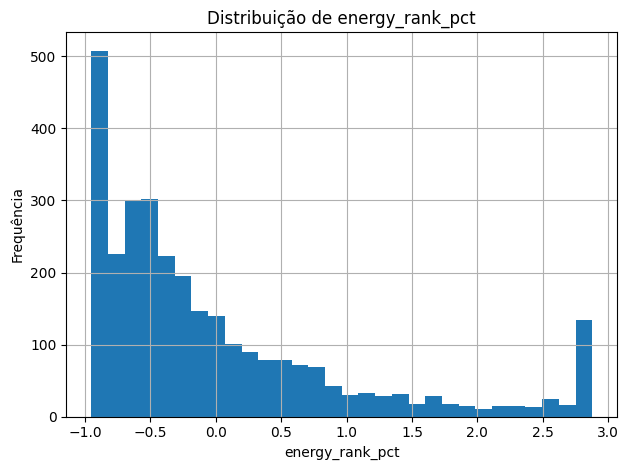

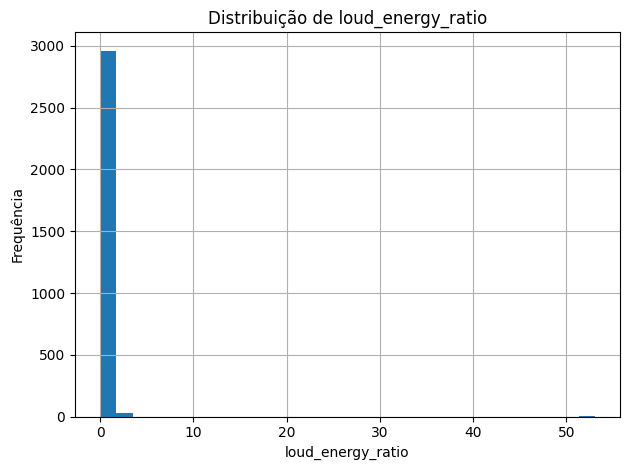

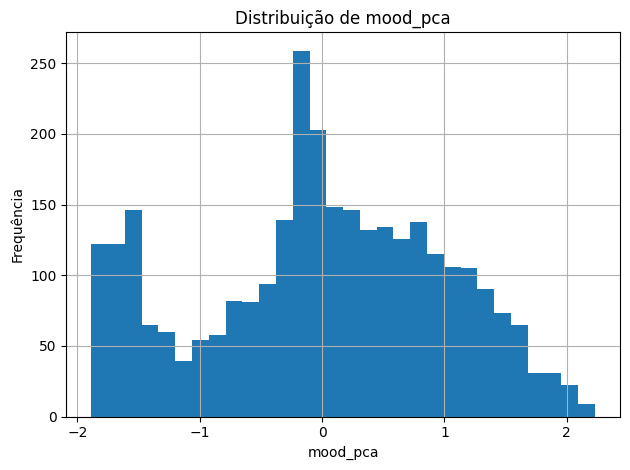

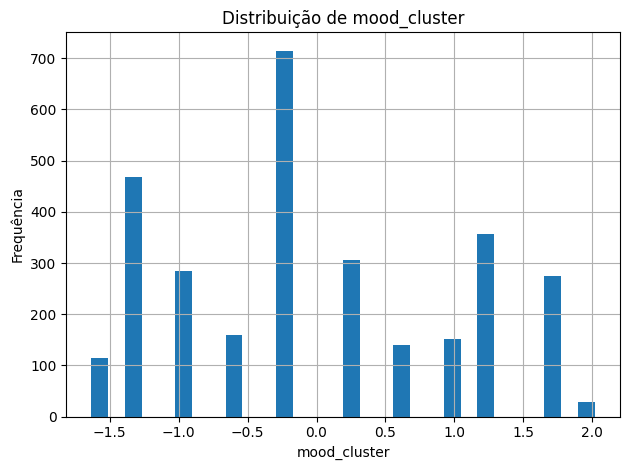

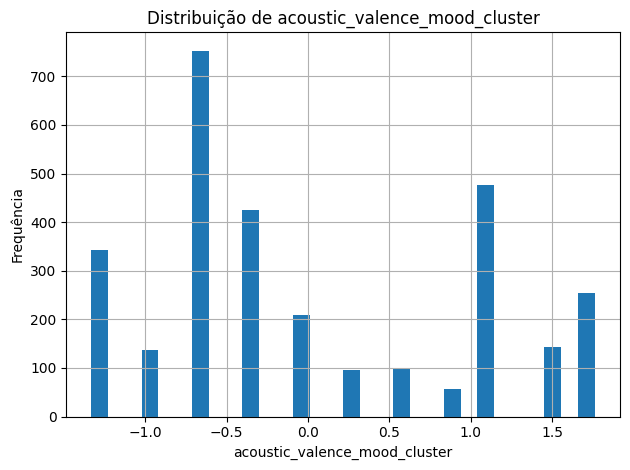

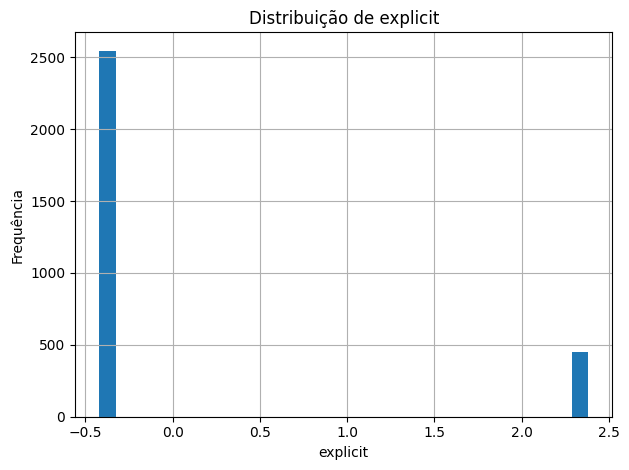

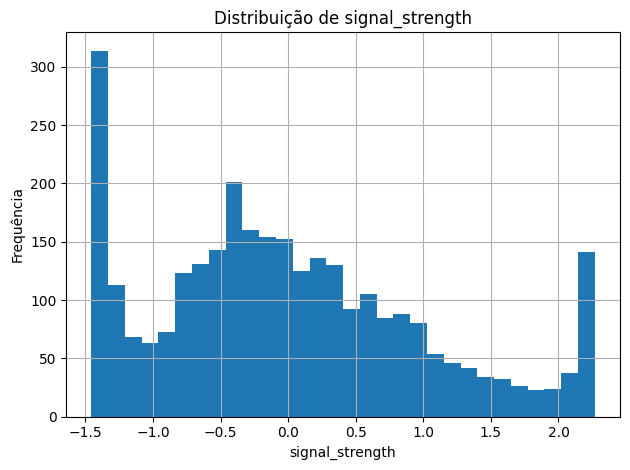

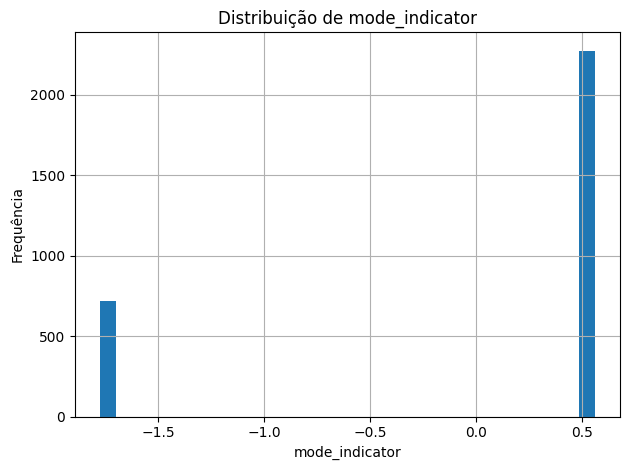

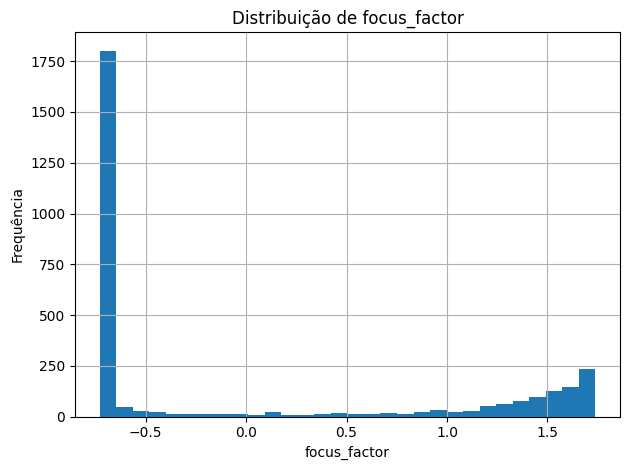

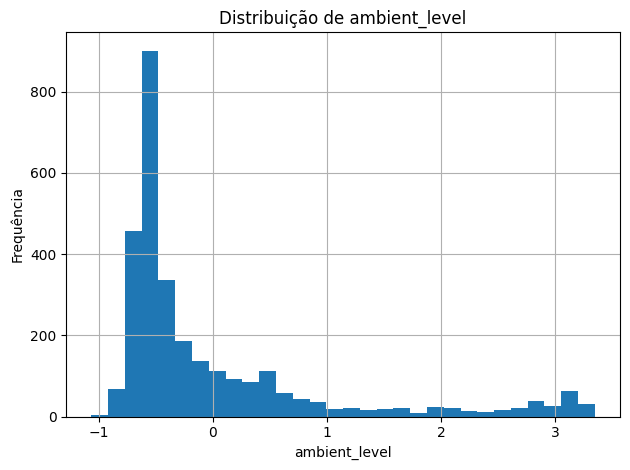

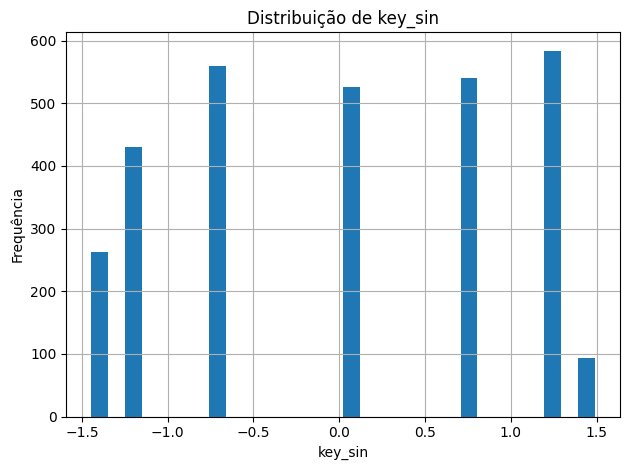

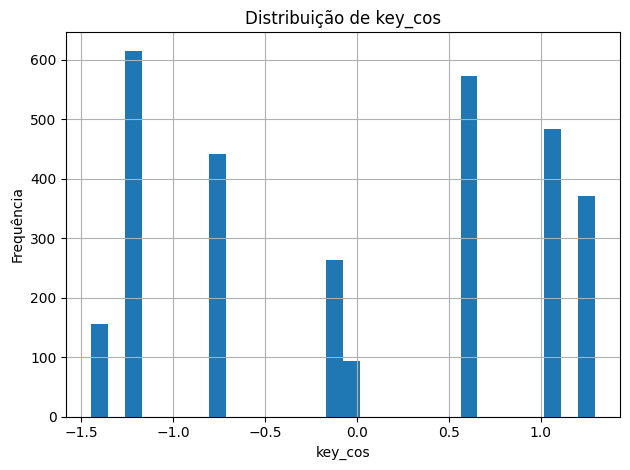

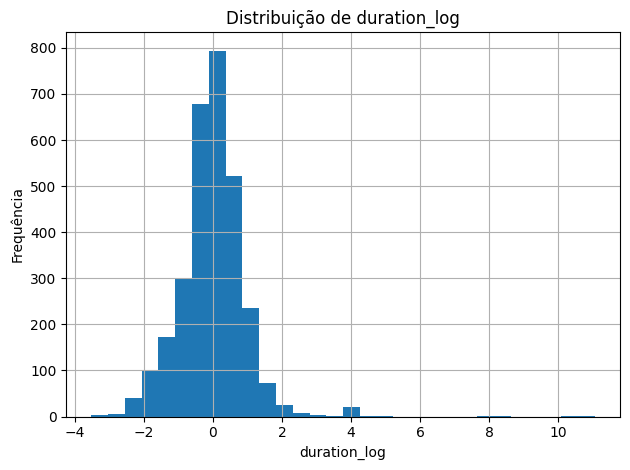

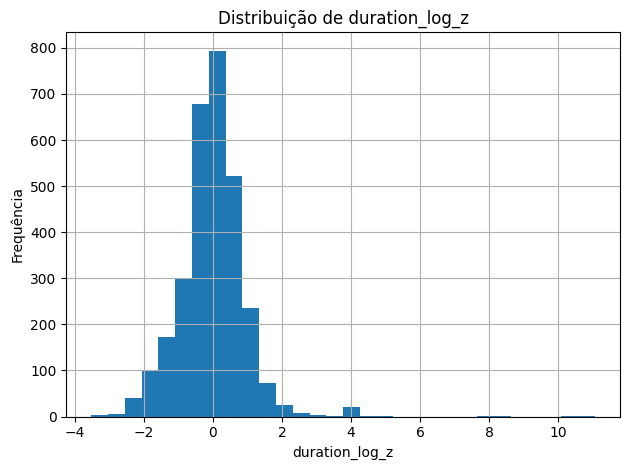

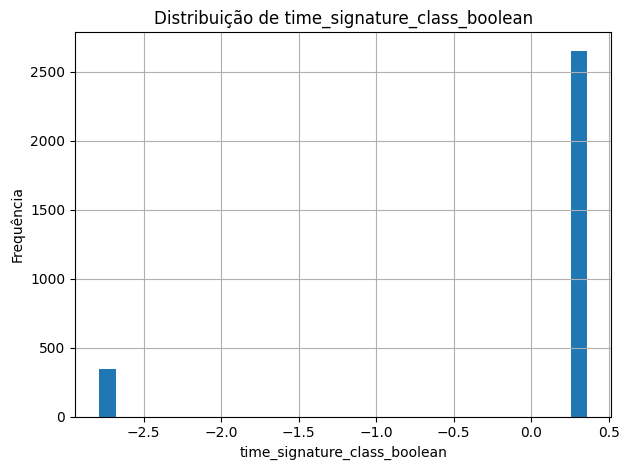

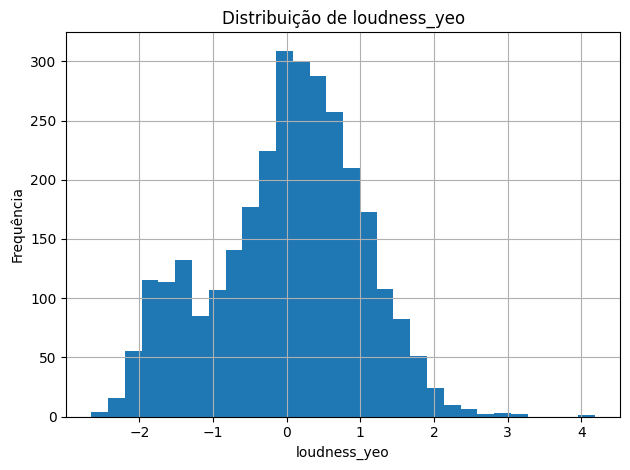

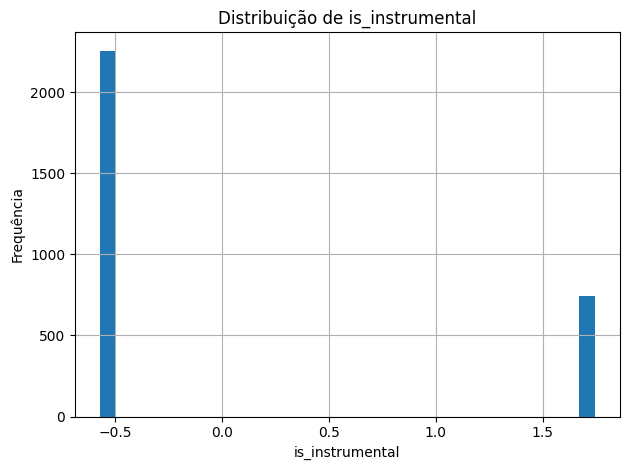

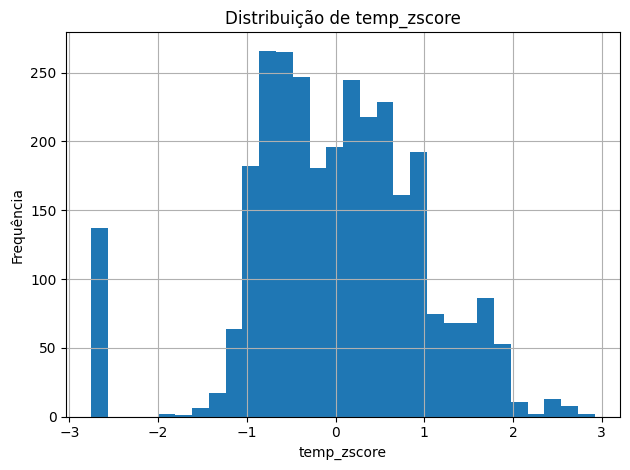

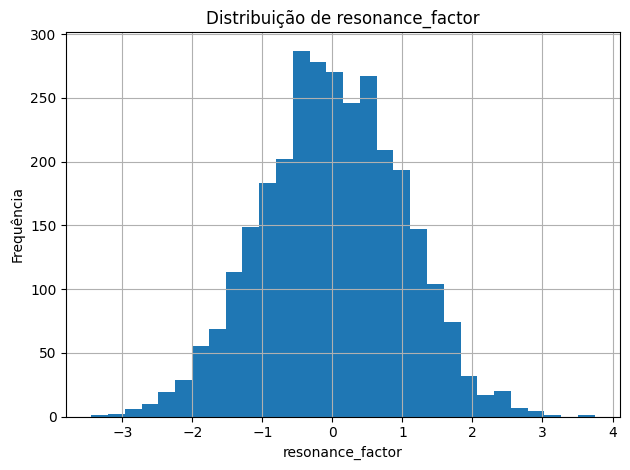

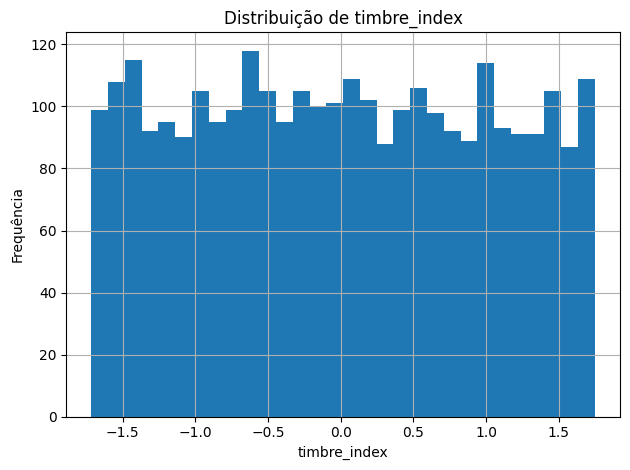

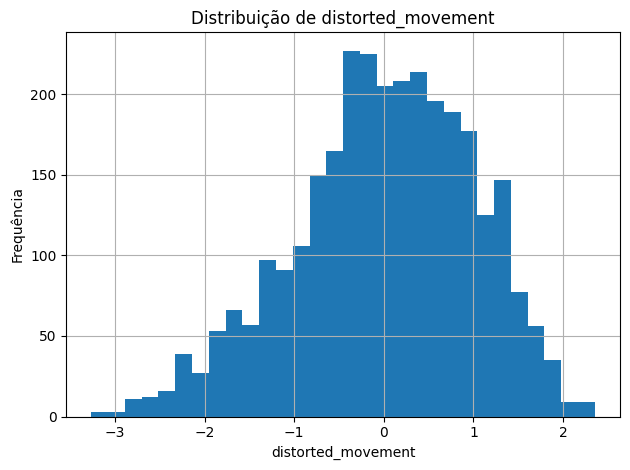

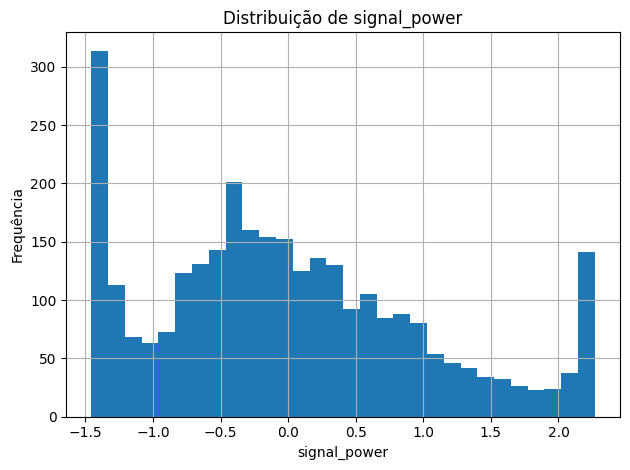

In [16]:

display(df.head())

features = [c for c in df.columns if c not in [target_class, target_regression]]

for feat in features:
    plt.figure()
    df[feat].dropna().hist(bins=30)
    plt.title(f"Distribuição de {feat}")
    plt.xlabel(feat); plt.ylabel("Frequência")
    plt.tight_layout(); plt.show()

## Análise Bivariada
Esta análise foca-se em examinar a relação entre as features e as variáveis target para entender o impacto de cada feature nos targets.

### Análise bivariada com o target de regressão
Aqui analisamos a relação entre as features e o target de regressão.

Top 10 |correlações| com target_regression:


,abs_corr,corr
artists_avg_popularity,0.940299,0.940299
popularity_level,0.466426,0.466426
artist_song_count,0.409517,-0.409517
explicit,0.370942,0.370942
album_freq,0.331766,-0.331766
verbal_density,0.331364,0.331364
mode_indicator,0.242538,-0.242538
positivity_index,0.239019,-0.239019
purity_score,0.187523,-0.187523
acoustics_instrumental,0.155630,0.155630


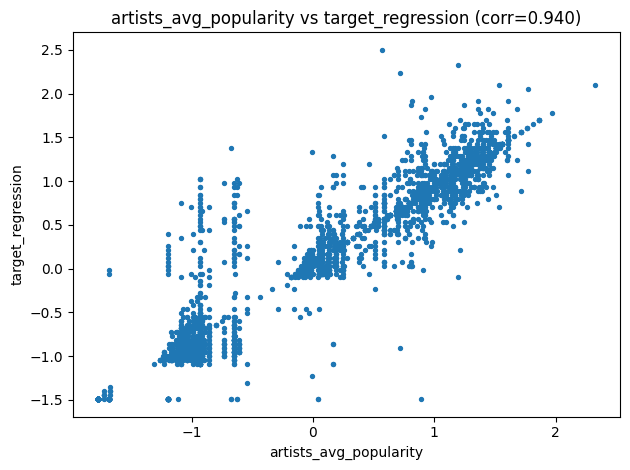

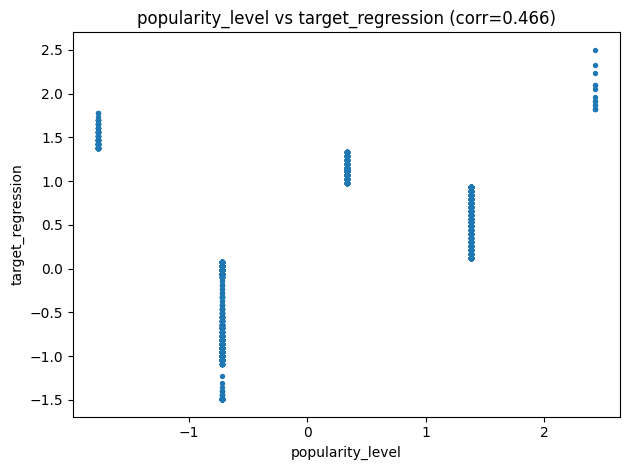

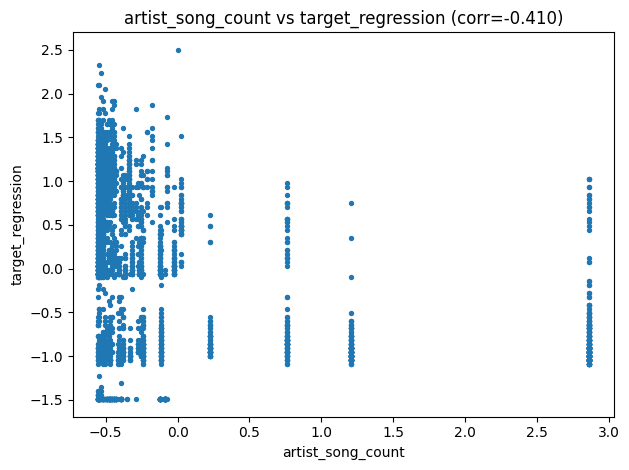

In [17]:
top10_corr_reg = None
if target_regression is not None:
    num_df = df.select_dtypes(include=[np.number])
    feats_num = num_df.drop(columns=[target_regression], errors='ignore')
    corr_series = feats_num.corrwith(df[target_regression]).dropna()
    corr_df = corr_series.abs().sort_values(ascending=False).to_frame("abs_corr")
    corr_df["corr"] = corr_series.loc[corr_df.index]
    top10_corr_reg = corr_df.head(10)
    print("Top 10 |correlações| com target_regression:")
    display(top10_corr_reg)

    for feat in top10_corr_reg.index[:3]:
        plt.figure()
        plt.scatter(df[feat], df[target_regression], s=8)
        plt.title(f"{feat} vs {target_regression} (corr={corr_series[feat]:.3f})")
        plt.xlabel(feat); plt.ylabel(target_regression)
        plt.tight_layout()
        plt.show()

### Análise bivariada com o target de classificação
Aqui analisamos a relação entre as features e o target de classificação.

Aqui usamos o classificador f_classif para selecionar as melhores features e utilizamos boxplots para visualizar a distribuição das features em relação às classes do target de classificação.

Primeiro, selecionamos as features numéricas e removemos a coluna do target de regressão porque não é relevante para esta análise.

Nums

Top 10 F-score (classificação):


,feature,F_score,p_value
0,movement_index,5302.478902,0.0
1,positivity_index,2496.449463,0.0
2,artists_avg_popularity,1965.653470,0.0
3,focus_factor,1882.780812,0.0
4,mood_pca,1843.731518,0.0
5,intensity_level,1825.088516,0.0
6,happy_dance,1781.270673,0.0
7,loudness_yeo,1660.211361,0.0
8,is_instrumental,1089.234841,0.0
9,artist_song_count,974.706533,0.0


C:\Users\DavidMendonça\AppData\Local\Temp\ipykernel_11936\1462719004.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=classes_sorted)


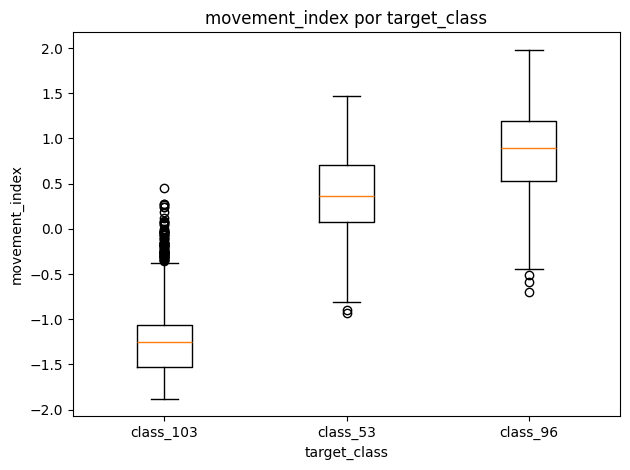

C:\Users\DavidMendonça\AppData\Local\Temp\ipykernel_11936\1462719004.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=classes_sorted)


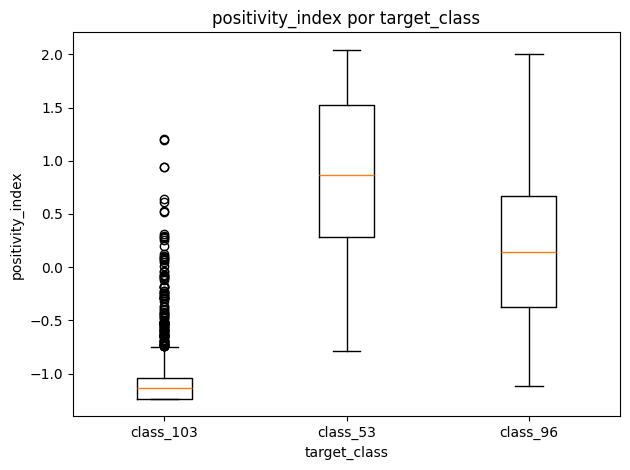

C:\Users\DavidMendonça\AppData\Local\Temp\ipykernel_11936\1462719004.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=classes_sorted)


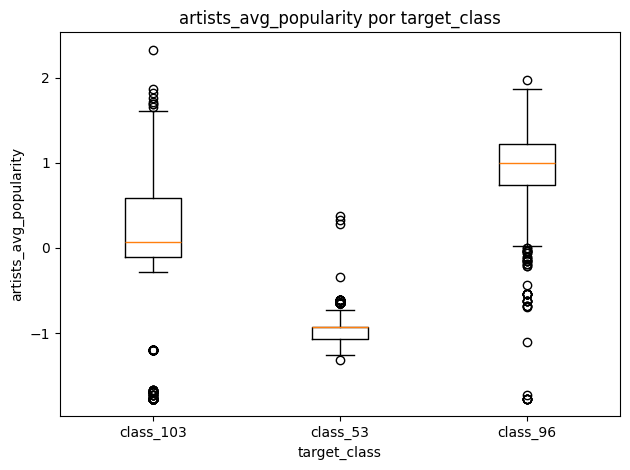

In [18]:
top10_f = None

X = df.select_dtypes(include=[np.number]).copy()
X = X.drop(columns=[target_regression])
y = df[target_class].astype(str)

le = LabelEncoder()
y_enc = le.fit_transform(y)

# remover colunas com NaN e constantes

X = X.loc[:, X.nunique() > 1]

f_vals, p_vals = f_classif(X, y_enc)
fdf = pd.DataFrame({"feature": X.columns, "F_score": f_vals, "p_value": p_vals})
fdf = fdf.replace([np.inf, -np.inf], np.nan).dropna(subset=["F_score"])
top10_f = fdf.sort_values("F_score", ascending=False).head(10).reset_index(drop=True)

print("Top 10 F-score (classificação):")
display(top10_f)

# boxplots para as 3 melhores
top3 = top10_f["feature"].head(3).tolist()
classes_sorted = sorted(df[target_class].astype(str).unique())
for feat in top3:
    plt.figure()
    data = [df[df[target_class].astype(str) == cls][feat].dropna() for cls in classes_sorted]
    plt.boxplot(data, labels=classes_sorted)
    plt.title(f"{feat} por {target_class}")
    plt.xlabel(target_class); plt.ylabel(feat)
    plt.tight_layout()
    plt.show()